In [490]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [491]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Loading the csv File and creating the dataset.

In [492]:
telecom = pd.read_csv("telecom_churn_data.csv", low_memory=False);

# Performing Basic Checks on the dataset.

In [493]:
telecom.shape

(99999, 226)

In [494]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [495]:
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [496]:
telecom.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [497]:
telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

# Imputing missing value..

In [498]:
# verifying which all fr=eature is having null values.
round(telecom.isnull().sum(axis=0)/(telecom.shape[0])*100).sort_values(ascending=False)

max_rech_data_6             75.0
count_rech_3g_6             75.0
av_rech_amt_data_6          75.0
date_of_last_rech_data_6    75.0
arpu_3g_6                   75.0
fb_user_6                   75.0
count_rech_2g_6             75.0
night_pck_user_6            75.0
arpu_2g_6                   75.0
total_rech_data_6           75.0
arpu_3g_8                   74.0
arpu_3g_7                   74.0
total_rech_data_7           74.0
arpu_3g_9                   74.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_9           74.0
total_rech_data_8           74.0
av_rech_amt_data_9          74.0
arpu_2g_7                   74.0
av_rech_amt_data_7          74.0
count_rech_3g_9             74.0
count_rech_3g_8             74.0
count_rech_3g_7             74.0
count_rech_2g_9             74.0
count_rech_2g_8             74.0
count_rech_2g_7             74.0
max_rech_data_9             74.0
max_rech_data_8             74.0
av_rech_am

# Finding missing values where more than 50% data is null

In [499]:
#Finding the Features where more than 50% data is null respect to each field 
round(telecom.isnull().sum(axis=0)/(telecom.shape[0])*100).sort_values(ascending=False)[(telecom.isnull().sum(axis=0)/(telecom.shape[0])*100).sort_values(ascending = False)>50]


max_rech_data_6             75.0
count_rech_3g_6             75.0
av_rech_amt_data_6          75.0
date_of_last_rech_data_6    75.0
arpu_3g_6                   75.0
fb_user_6                   75.0
count_rech_2g_6             75.0
night_pck_user_6            75.0
arpu_2g_6                   75.0
total_rech_data_6           75.0
arpu_3g_8                   74.0
arpu_3g_7                   74.0
total_rech_data_7           74.0
arpu_3g_9                   74.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_9           74.0
total_rech_data_8           74.0
av_rech_amt_data_9          74.0
arpu_2g_7                   74.0
av_rech_amt_data_7          74.0
count_rech_3g_9             74.0
count_rech_3g_8             74.0
count_rech_3g_7             74.0
count_rech_2g_9             74.0
count_rech_2g_8             74.0
count_rech_2g_7             74.0
max_rech_data_9             74.0
max_rech_data_8             74.0
av_rech_am

In [500]:
#Creating a list with the Feature columns where more than 50% data is null respect to each field 
imputeList = (telecom.isnull().sum(axis=0)/(telecom.shape[0])*100).sort_values(ascending=False)[(telecom.isnull().sum(axis=0)/(telecom.shape[0])*100).sort_values(ascending = False)>50].index.to_list()

In [501]:
imputeList

['count_rech_2g_6',
 'date_of_last_rech_data_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'max_rech_data_6',
 'total_rech_data_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'fb_user_6',
 'arpu_3g_7',
 'count_rech_2g_7',
 'fb_user_7',
 'count_rech_3g_7',
 'arpu_2g_7',
 'av_rech_amt_data_7',
 'max_rech_data_7',
 'night_pck_user_7',
 'total_rech_data_7',
 'date_of_last_rech_data_7',
 'night_pck_user_9',
 'date_of_last_rech_data_9',
 'fb_user_9',
 'arpu_2g_9',
 'max_rech_data_9',
 'arpu_3g_9',
 'total_rech_data_9',
 'av_rech_amt_data_9',
 'count_rech_3g_9',
 'count_rech_2g_9',
 'fb_user_8',
 'av_rech_amt_data_8',
 'count_rech_3g_8',
 'count_rech_2g_8',
 'date_of_last_rech_data_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'night_pck_user_8']

# Finding Categorical variable among the dataset features..

In [502]:
#Finding the variance of data for each fields
telecom.nunique().sort_values(ascending = True)

std_ic_t2o_mou_6                1
std_og_t2c_mou_8                1
std_og_t2c_mou_9                1
std_ic_t2o_mou_9                1
std_ic_t2o_mou_8                1
std_og_t2c_mou_7                1
std_ic_t2o_mou_7                1
last_date_of_month_9            1
std_og_t2c_mou_6                1
last_date_of_month_7            1
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_8            1
last_date_of_month_6            1
night_pck_user_7                2
night_pck_user_8                2
night_pck_user_9                2
night_pck_user_6                2
fb_user_9                       2
fb_user_8                       2
fb_user_7                       2
fb_user_6                       2
monthly_2g_9                    5
monthly_2g_6                    5
monthly_2g_7                    6
monthly_2g_8                    6
monthly_3g_9                   11
monthly_3g_6  

In [503]:
# Considering fb_user and night_pck_user Field as Categorical in Nature as they are having 2 different combination of data .
categorial_impute_list = ['fb_user_7','fb_user_6','fb_user_9','fb_user_8','night_pck_user_9','night_pck_user_6',
                         'night_pck_user_7','night_pck_user_8']

In [504]:
categorial_impute_list

['fb_user_7',
 'fb_user_6',
 'fb_user_9',
 'fb_user_8',
 'night_pck_user_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8']

In [505]:
#Removing Categorical Variable from more than 50% null value feature List...

imputeList= [i for i in imputeList if i not in categorial_impute_list] 

In [506]:
imputeList

['count_rech_2g_6',
 'date_of_last_rech_data_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'max_rech_data_6',
 'total_rech_data_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'arpu_3g_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'arpu_2g_7',
 'av_rech_amt_data_7',
 'max_rech_data_7',
 'total_rech_data_7',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_9',
 'arpu_2g_9',
 'max_rech_data_9',
 'arpu_3g_9',
 'total_rech_data_9',
 'av_rech_amt_data_9',
 'count_rech_3g_9',
 'count_rech_2g_9',
 'av_rech_amt_data_8',
 'count_rech_3g_8',
 'count_rech_2g_8',
 'date_of_last_rech_data_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'arpu_3g_8',
 'arpu_2g_8']

In [507]:
# Replacing the null values with -1 for the categorial features
for x in categorial_impute_list:
    telecom[x].fillna(-1,inplace=True)

# Creating Dummy Variable for Categorical Fields..

In [508]:
# Creating Categorical variable for fb_user_7 
fb_user_7 = pd.get_dummies(telecom['fb_user_7'],drop_first=True, prefix = "fb_user_7" )
telecom  = pd.concat([telecom,fb_user_7],axis=1)
telecom = telecom.drop('fb_user_7',axis=1)

In [509]:
# Creating Categorical variable for fb_user_6
fb_user_6 = pd.get_dummies(telecom['fb_user_6'],drop_first=True, prefix = "fb_user_6" )
telecom  = pd.concat([telecom,fb_user_6],axis=1)
telecom = telecom.drop('fb_user_6',axis=1)

In [510]:
# Creating Categorical variable for fb_user_9
fb_user_9 = pd.get_dummies(telecom['fb_user_9'],drop_first=True, prefix = "fb_user_9" )
telecom  = pd.concat([telecom,fb_user_9],axis=1)
telecom = telecom.drop('fb_user_9',axis=1)

In [511]:
# Creating Categorical variable for fb_user_8
fb_user_8 = pd.get_dummies(telecom['fb_user_8'],drop_first=True, prefix = "fb_user_8" )
telecom  = pd.concat([telecom,fb_user_8],axis=1)
telecom = telecom.drop('fb_user_8',axis=1)

In [512]:
# Finding List of feature which is related to fb_user
list(telecom.filter(regex='fb_user').columns)

['fb_user_7_0.0',
 'fb_user_7_1.0',
 'fb_user_6_0.0',
 'fb_user_6_1.0',
 'fb_user_9_0.0',
 'fb_user_9_1.0',
 'fb_user_8_0.0',
 'fb_user_8_1.0']

In [513]:
# Creating Categorical variable for night_pck_user_9 
night_pck_user_9 = pd.get_dummies(telecom['night_pck_user_9'],drop_first=True, prefix = "night_pck_user_9" )
telecom  = pd.concat([telecom,night_pck_user_9],axis=1)
telecom = telecom.drop('night_pck_user_9',axis=1)

In [514]:
# Creating Categorical variable for night_pck_user_8
night_pck_user_8 = pd.get_dummies(telecom['night_pck_user_8'],drop_first=True, prefix = "night_pck_user_8" )
telecom  = pd.concat([telecom,night_pck_user_8],axis=1)
telecom = telecom.drop('night_pck_user_8',axis=1)

In [515]:
# Creating Categorical variable for night_pck_user_7
night_pck_user_7 = pd.get_dummies(telecom['night_pck_user_7'],drop_first=True, prefix = "night_pck_user_7" )
telecom  = pd.concat([telecom,night_pck_user_7],axis=1)
telecom = telecom.drop('night_pck_user_7',axis=1)

In [516]:
# Creating Categorical variable for night_pck_user_6
night_pck_user_6 = pd.get_dummies(telecom['night_pck_user_6'],drop_first=True, prefix = "night_pck_user_6" )
telecom  = pd.concat([telecom,night_pck_user_6],axis=1)
telecom = telecom.drop('night_pck_user_6',axis=1)

In [517]:
# Finding List of feature which is related to night_pck_user
list(telecom.filter(regex='night_pck_user').columns)

['night_pck_user_9_0.0',
 'night_pck_user_9_1.0',
 'night_pck_user_8_0.0',
 'night_pck_user_8_1.0',
 'night_pck_user_7_0.0',
 'night_pck_user_7_1.0',
 'night_pck_user_6_0.0',
 'night_pck_user_6_1.0']

# Imputing missing values where more than 50% data is null

In [518]:
# Replacing the null values with 0 for each features where more than 50% data is null
for x in imputeList:
    telecom[x].fillna(0,inplace=True)

# Imputing missing values where more than 5% data is null

In [519]:
#Finding the Features where more than 5% data is null respect to each field 
(telecom.isnull().sum(axis=0)/(telecom.shape[0])*100).sort_values(ascending=False)[(telecom.isnull().sum(axis=0)/(telecom.shape[0])*100).sort_values(ascending = False)>5]

std_ic_t2o_mou_9    7.745077
loc_og_t2t_mou_9    7.745077
spl_og_mou_9        7.745077
roam_og_mou_9       7.745077
og_others_9         7.745077
std_og_mou_9        7.745077
loc_ic_t2t_mou_9    7.745077
roam_ic_mou_9       7.745077
loc_og_mou_9        7.745077
ic_others_9         7.745077
loc_og_t2m_mou_9    7.745077
offnet_mou_9        7.745077
isd_ic_mou_9        7.745077
std_og_t2c_mou_9    7.745077
spl_ic_mou_9        7.745077
onnet_mou_9         7.745077
isd_og_mou_9        7.745077
loc_ic_t2m_mou_9    7.745077
std_og_t2f_mou_9    7.745077
std_ic_mou_9        7.745077
loc_og_t2f_mou_9    7.745077
loc_ic_t2f_mou_9    7.745077
std_ic_t2f_mou_9    7.745077
std_og_t2m_mou_9    7.745077
std_ic_t2m_mou_9    7.745077
std_ic_t2t_mou_9    7.745077
loc_og_t2c_mou_9    7.745077
loc_ic_mou_9        7.745077
std_og_t2t_mou_9    7.745077
std_og_t2f_mou_8    5.378054
std_og_t2m_mou_8    5.378054
isd_og_mou_8        5.378054
std_og_t2c_mou_8    5.378054
loc_ic_t2m_mou_8    5.378054
spl_og_mou_8  

In [520]:
# Creating a list with the Feature columns where more than 5% data is null respect to each field 
null_impute_list =(telecom.isnull().sum(axis=0)/(telecom.shape[0])*100).sort_values(ascending=False)[(telecom.isnull().sum(axis=0)/(telecom.shape[0])*100).sort_values(ascending = False)>5].index.to_list()

In [521]:
null_impute_list

['std_ic_t2o_mou_9',
 'loc_og_t2t_mou_9',
 'spl_og_mou_9',
 'roam_og_mou_9',
 'og_others_9',
 'std_og_mou_9',
 'loc_ic_t2t_mou_9',
 'roam_ic_mou_9',
 'loc_og_mou_9',
 'ic_others_9',
 'loc_og_t2m_mou_9',
 'offnet_mou_9',
 'isd_ic_mou_9',
 'std_og_t2c_mou_9',
 'spl_ic_mou_9',
 'onnet_mou_9',
 'isd_og_mou_9',
 'loc_ic_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_ic_mou_9',
 'loc_og_t2f_mou_9',
 'loc_ic_t2f_mou_9',
 'std_ic_t2f_mou_9',
 'std_og_t2m_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2t_mou_9',
 'loc_og_t2c_mou_9',
 'loc_ic_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2f_mou_8',
 'std_og_t2m_mou_8',
 'isd_og_mou_8',
 'std_og_t2c_mou_8',
 'loc_ic_t2m_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'loc_ic_t2t_mou_8',
 'ic_others_8',
 'isd_ic_mou_8',
 'spl_ic_mou_8',
 'loc_ic_t2f_mou_8',
 'std_ic_mou_8',
 'std_ic_t2o_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2t_mou_8',
 'loc_ic_mou_8',
 'std_og_t2t_mou_8',
 'std_og_mou_8',
 'loc_og_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'roam_ic_

In [522]:
# Creating a sub dataset from telecom dataset only with the Feature columns where more than 5% data is null respect 
#to each field 
telecom_null_imputation_dataset = telecom[null_impute_list]

In [523]:
telecom_null_imputation_dataset.shape

(99999, 58)

In [524]:
# Describing the sub dataset created from telecom dataset only with the Feature columns where more than 5% data 
# is null respect to each field to determine if any outlier present or not
telecom_null_imputation_dataset.describe([.25,.50,.75,.99])

std_ic_t2o_mou_9  loc_og_t2t_mou_9  spl_og_mou_9  roam_og_mou_9  \
count           92254.0      92254.000000  92254.000000   92254.000000   
mean                0.0         44.584446      4.412767       8.555519   
std                 0.0        147.995390     16.328227      58.438186   
min                 0.0          0.000000      0.000000       0.000000   
25%                 0.0          1.360000      0.000000       0.000000   
50%                 0.0         11.260000      0.000000       0.000000   
75%                 0.0         39.280000      3.230000       0.000000   
99%                 0.0        513.996400     54.410000     192.789900   
max                 0.0      10389.240000   1635.710000    4428.460000   

        og_others_9  std_og_mou_9  loc_ic_t2t_mou_9  roam_ic_mou_9  \
count  92254.000000  92254.000000      92254.000000   92254.000000   
mean       0.047456    169.664466         46.281794       6.343841   
std        3.635466    405.138658        140.130610      57.137537   
min        0.000000      0.000000          0.000000       0.000000   
25%        0.000000      0.000000          3.290000       0.000000   
50%        0.000000      8.410000         15.660000       0.000000   
75%        0.000000    142.105000         45.180000       0.000000   
99%        0.000000   1906.309900        459.093200     140.983500   
max      787.790000  11495.310000      10598.830000    8464.030000   

       loc_og_mou_9   ic_others_9  loc_og_t2m_mou_9  offnet_mou_9  \
count  92254.000000  92254.000000      92254.000000  92254.000000   
mean     138.709970      1.017162         90.463192    190.337222   
std      245.934517     12.381172        158.681454    319.396092   
min        0.000000      0.000000          0.000000      0.000000   
25%       15.560000      0.000000          8.810000     27.130000   
50%       61.840000      0.000000         39.120000     87.290000   
75%      162.225000      0.000000        106.810000    220.505000   
99%     1115.749200     17.028800        722.759500   1521.328700   
max    11099.260000   1005.230000       4429.880000  10310.760000   

       isd_ic_mou_9  std_og_t2c_mou_9  spl_ic_mou_9   onnet_mou_9  \
count  92254.000000           92254.0  92254.000000  92254.000000   
mean       8.063003               0.0      0.163137    130.302327   
std       63.505379               0.0      0.527860    308.477668   
min        0.000000               0.0      0.000000      0.000000   
25%        0.000000               0.0      0.000000      5.330000   
50%        0.000000               0.0      0.000000     29.840000   
75%        0.000000               0.0      0.060000    112.130000   
99%      168.660500               0.0      2.140000   1445.766400   
max     5057.740000               0.0     62.380000  10427.460000   

       isd_og_mou_9  loc_ic_t2m_mou_9  std_og_t2f_mou_9  std_ic_mou_9  \
count  92254.000000      92254.000000      92254.000000  92254.000000   
mean       0.723892        106.155471          1.042362     31.229344   
std       21.310751        165.492803          8.261770    101.982303   
min        0.000000          0.000000          0.000000      0.000000   
25%        0.000000         18.560000          0.000000      0.000000   
50%        0.000000         56.610000          0.000000      5.380000   
75%        0.000000        130.490000          0.000000     25.690000   
99%        6.619400        763.493800         24.169400    388.001000   
max     4244.530000       5463.780000        808.490000   5956.660000   

       loc_og_t2f_mou_9  loc_ic_t2f_mou_9  std_ic_t2f_mou_9  std_og_t2m_mou_9  \
count      92254.000000      92254.000000      92254.000000      92254.000000   
mean           3.655123         12.173105          2.173419         86.276622   
std           13.457549         43.840776         15.978601        261.407396   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000      

In [525]:
# Finding the median for the sub dataset created from telecom dataset only with the Feature columns where more than 5% data 
# is null respect to each field
telecom_null_imputation_dataset.median()

std_ic_t2o_mou_9     0.00
loc_og_t2t_mou_9    11.26
spl_og_mou_9         0.00
roam_og_mou_9        0.00
og_others_9          0.00
std_og_mou_9         8.41
loc_ic_t2t_mou_9    15.66
roam_ic_mou_9        0.00
loc_og_mou_9        61.84
ic_others_9          0.00
loc_og_t2m_mou_9    39.12
offnet_mou_9        87.29
isd_ic_mou_9         0.00
std_og_t2c_mou_9     0.00
spl_ic_mou_9         0.00
onnet_mou_9         29.84
isd_og_mou_9         0.00
loc_ic_t2m_mou_9    56.61
std_og_t2f_mou_9     0.00
std_ic_mou_9         5.38
loc_og_t2f_mou_9     0.00
loc_ic_t2f_mou_9     0.96
std_ic_t2f_mou_9     0.00
std_og_t2m_mou_9     2.50
std_ic_t2m_mou_9     1.74
std_ic_t2t_mou_9     0.00
loc_og_t2c_mou_9     0.00
loc_ic_mou_9        91.64
std_og_t2t_mou_9     0.00
std_og_t2f_mou_8     0.00
std_og_t2m_mou_8     3.31
isd_og_mou_8         0.00
std_og_t2c_mou_8     0.00
loc_ic_t2m_mou_8    58.24
spl_og_mou_8         0.00
og_others_8          0.00
loc_ic_t2t_mou_8    16.03
ic_others_8          0.00
isd_ic_mou_8

In [526]:
# Replacing the null values with median for each features where more than 5% data is null
for x in null_impute_list:
    telecom[x].fillna(telecom[x].median(),inplace=True)

In [527]:
telecom.shape

(99999, 234)

# Imputing missing values where more than 0% data is null

In [528]:
# Finding a list with the Feature columns where more than 0% data is null respect to each field 
(telecom.isnull().sum(axis=0)/(telecom.shape[0])*100).sort_values(ascending=False)[(telecom.isnull().sum(axis=0)/(telecom.shape[0])*100).sort_values(ascending = False)>0]


date_of_last_rech_9     4.760048
roam_og_mou_6           3.937039
loc_og_t2m_mou_6        3.937039
loc_og_t2f_mou_6        3.937039
loc_og_t2c_mou_6        3.937039
loc_og_mou_6            3.937039
std_og_t2t_mou_6        3.937039
std_og_t2m_mou_6        3.937039
std_og_t2f_mou_6        3.937039
std_og_mou_6            3.937039
isd_og_mou_6            3.937039
spl_og_mou_6            3.937039
og_others_6             3.937039
std_og_t2c_mou_6        3.937039
loc_ic_t2t_mou_6        3.937039
loc_ic_t2m_mou_6        3.937039
loc_ic_t2f_mou_6        3.937039
ic_others_6             3.937039
isd_ic_mou_6            3.937039
loc_ic_mou_6            3.937039
spl_ic_mou_6            3.937039
std_ic_t2t_mou_6        3.937039
std_ic_mou_6            3.937039
std_ic_t2m_mou_6        3.937039
std_ic_t2o_mou_6        3.937039
loc_og_t2t_mou_6        3.937039
std_ic_t2f_mou_6        3.937039
roam_ic_mou_6           3.937039
onnet_mou_6             3.937039
offnet_mou_6            3.937039
roam_og_mo

In [529]:
# Creating a list with the Feature columns where more than 0% data is null respect to each field 
missing_value_less_than_5 =(telecom.isnull().sum(axis=0)/(telecom.shape[0])*100).sort_values(ascending=False)[(telecom.isnull().sum(axis=0)/(telecom.shape[0])*100).sort_values(ascending = False)>0].index.to_list()


In [530]:
missing_value_less_than_5

['date_of_last_rech_9',
 'roam_og_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'std_og_t2c_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'ic_others_6',
 'isd_ic_mou_6',
 'loc_ic_mou_6',
 'spl_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2o_mou_6',
 'loc_og_t2t_mou_6',
 'std_ic_t2f_mou_6',
 'roam_ic_mou_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_og_mou_7',
 'loc_og_mou_7',
 'std_og_t2t_mou_7',
 'og_others_7',
 'spl_ic_mou_7',
 'offnet_mou_7',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_7',
 'isd_ic_mou_7',
 'std_og_t2c_mou_7',
 'loc_ic_t2f_mou_7',
 'ic_others_7',
 'std_og_mou_7',
 'spl_og_mou_7',
 'onnet_mou_7',
 'isd_og_mou_7',
 'loc_ic_t2t_mou_7',
 'loc_ic_mou_7',
 'loc_ic_t2m_mou_7',
 'loc_og_t2m_mou_7',
 'std_ic_t2f_mou_7',
 'std_ic_t2t_mou_7',
 'loc_og_t2c

In [531]:
#Removing the records where all the features contains null value. So Basically we are not considerung the records 
# where less than 5% data is missing for building the model
telecom = telecom[~telecom[missing_value_less_than_5].isnull().all(axis=1)]

In [532]:
telecom.shape

(99956, 234)

# Checking the variation for each feature present in Dataset

In [533]:
telecom.nunique().sort_values(ascending = True)

std_ic_t2o_mou_9                1
std_og_t2c_mou_8                1
std_og_t2c_mou_9                1
std_ic_t2o_mou_6                1
std_ic_t2o_mou_7                1
std_ic_t2o_mou_8                1
std_og_t2c_mou_7                1
last_date_of_month_9            1
std_og_t2c_mou_6                1
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
night_pck_user_7_1.0            2
night_pck_user_6_0.0            2
fb_user_7_0.0                   2
fb_user_7_1.0                   2
fb_user_6_1.0                   2
fb_user_9_0.0                   2
fb_user_9_1.0                   2
fb_user_8_0.0                   2
night_pck_user_9_0.0            2
night_pck_user_9_1.0            2
night_pck_user_8_0.0            2
night_pck_user_8_1.0            2
night_pck_user_7_0.0            2
fb_user_6_0.0 

# Removing Feature where Dataset is having no Variation.

In [534]:
telecom = telecom.drop(columns=['std_ic_t2o_mou_9','std_og_t2c_mou_8','std_og_t2c_mou_9','std_ic_t2o_mou_6',
'std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_og_t2c_mou_7','std_og_t2c_mou_6','loc_og_t2o_mou','std_og_t2o_mou',
'loc_ic_t2o_mou','last_date_of_month_9','circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'])


In [535]:
telecom.nunique().sort_values(ascending = True)

night_pck_user_6_1.0            2
fb_user_7_0.0                   2
night_pck_user_6_0.0            2
fb_user_6_1.0                   2
fb_user_9_0.0                   2
fb_user_9_1.0                   2
fb_user_7_1.0                   2
fb_user_8_0.0                   2
fb_user_8_1.0                   2
night_pck_user_9_0.0            2
night_pck_user_9_1.0            2
fb_user_6_0.0                   2
night_pck_user_7_0.0            2
night_pck_user_7_1.0            2
night_pck_user_8_1.0            2
night_pck_user_8_0.0            2
monthly_2g_6                    5
monthly_2g_9                    5
monthly_2g_8                    6
monthly_2g_7                    6
monthly_3g_9                   11
monthly_3g_6                   12
monthly_3g_8                   12
monthly_3g_7                   15
count_rech_3g_6                25
sachet_3g_6                    25
count_rech_3g_9                27
sachet_3g_7                    27
sachet_3g_9                    27
count_rech_3g_

In [536]:
telecom.shape

(99956, 218)

# Checking the non-numerical  Features present in dataset..

In [537]:
list(telecom.dtypes[telecom.dtypes =='object'].index)

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

# Removing Date Related Features from dataset 

In [538]:
list(telecom.filter(regex='date').columns)

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [539]:
telecom = telecom.drop(columns=list(telecom.filter(regex='date').columns))

In [540]:
telecom.shape

(99956, 210)

# Fixing Features Name..

In [541]:
telecom.columns.to_list()

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_

In [542]:
telecom.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
                      'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)

In [543]:
telecom.columns.to_list()

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_

# Finding High Value Customer.

In [544]:
#Finding the features which is related to recharge
telecom.filter(regex=('rech')).columns

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

In [545]:
# Deriving the variable 'total_rech_num_data' for each month to get the total count of recharge for 2g and 3g with 
# respect each mobile number
for i in range(6,10):
    telecom['total_rech_num_data_'+str(i)] = telecom['count_rech_2g_'+str(i)]+telecom['count_rech_3g_'+str(i)]

In [546]:
telecom.filter(regex=('total_rech_num_data')).head()

total_rech_num_data_6  total_rech_num_data_7  total_rech_num_data_8  \
0                    1.0                    1.0                    1.0   
1                    0.0                    1.0                    2.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    1.0                    0.0                    0.0   

   total_rech_num_data_9  
0                    0.0  
1                    0.0  
2                    1.0  
3                    0.0  
4                    0.0

In [547]:
# Deriving the variable 'total_month_rech_' for each month to get the total recharge data amount for 2g and 3g with 
# respect each mobile number

for i in range(6,10):
    telecom['total_rech_amt_data_'+str(i)] = telecom['total_rech_num_data_'+str(i)]*telecom['av_rech_amt_data_'+str(i)]

In [548]:
# Deriving the variable 'total_rech_amt_data' for each month to get the total recharge amount including calls and 
# data amount for 2g and 3g with respect each mobile number

for i in range(6,10):
    telecom['total_month_rech_'+str(i)] = telecom['total_rech_amt_'+str(i)]+telecom['total_rech_amt_data_'+str(i)]

In [549]:
telecom.filter(regex=('total_month_rech')).head()

total_month_rech_6  total_month_rech_7  total_month_rech_8  \
0               614.0               504.0               504.0   
1                74.0               538.0               383.0   
2               168.0               315.0               116.0   
3               230.0               310.0               601.0   
4               252.0               350.0               287.0   

   total_month_rech_9  
0                 0.0  
1               121.0  
2               404.0  
3               410.0  
4               200.0

In [550]:
# Getting average total recharge amount spent in month June and July (Good Phase)
avg_goodPhase =(telecom.total_month_rech_6 + telecom.total_month_rech_7)/2

In [551]:
# Getting the cut-off value as 70 percentile total recharge amount spent in month June and July (Good Phase)
high_value_customer_cutoff = np.percentile(avg_goodPhase,70)

In [552]:
# Detemining the list of high value Customer.
high_value_customer = telecom[avg_goodPhase >= high_value_customer_cutoff]

In [553]:
high_value_customer.reset_index(inplace=True,drop=True)

In [554]:
high_value_customer.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0     7000842753   197.385   214.816   213.803   21.100          NaN   
1     7000701601  1069.180  1349.850  3171.480  500.000        57.84   
2     7001524846   378.721   492.223   137.362  166.787       413.69   
3     7002124215   514.453   597.753   637.760  578.596       102.41   
4     7000887461    74.350   193.897   366.966  811.480        48.96   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00        29.84           NaN           NaN   
1        54.68        52.29        29.84        453.43        567.16   
2       351.03        35.08        33.46         94.66         80.63   
3       132.11        85.14       161.63        757.93        896.68   
4        50.66        33.58        15.74         85.41         89.36   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00         87.29            NaN            NaN           0.00   
1        325.91         87.29          16.23          33.49          31.64   
2        136.48        108.71           0.00           0.00           0.00   
3        983.39        869.89           0.00           0.00           0.00   
4        205.89        111.88           0.00           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            0.0            NaN            NaN           0.00            0.0   
1            0.0          23.74          12.59          38.06            0.0   
2            0.0           0.00           0.00           0.00            0.0   
3            0.0           0.00           0.00           0.00            0.0   
4            0.0           0.00           0.00           0.00            0.0   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00             11.26   
1             51.39             31.38             40.28             11.26   
2            297.13            217.59             12.49             26.13   
3              4.48              6.16             23.34             29.98   
4             48.96             50.66             33.58             15.74   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00             39.12   
1            308.63            447.38            162.28             39.12   
2             80.96             70.58             50.54             34.58   
3             91.81             87.93            104.81            107.54   
4             82.94             83.01            148.56             83.73   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00              0.00   
1             62.13             55.14             53.23              0.00   
2              0.00              0.00              0.00              0.00   
3              0.75              0.00              1.58              0.00   
4              0.00              0.00              0.00              2.45   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN              0.00              0.00   
1               0.0               0.0              0.00              0.00   
2               0.0               0.0              7.15              0.00   
3               0.0               0.0              0.00              0.00   
4               0.0               0.0             17.71              4.08   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN           NaN          0.00         61.84               NaN   
1        422.16        533.91        255.79         61.84              4.30   
2        378.09        288.18         63.04         60.71            116.56   
3         97.04    

In [555]:
high_value_customer.columns.to_list()

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_

# Derive Churn Variable/ target Variable .

In [556]:
# Deriving Churn Feature /Target variable based on below feature for 9th/ Sep month.
churn_dependsOn = ['vol_2g_mb_9','vol_3g_mb_9','total_ic_mou_9','total_og_mou_9']

In [557]:
# Get Churn Feature /Target variable for High value customers.
def getChurnStatus(high_value_customer):
    flag = ~high_value_customer[[s for s in churn_dependsOn ]].any(axis=1)
    flag = flag.map({True:1, False:0})
    return flag

In [558]:
high_value_customer['churn'] = getChurnStatus(high_value_customer)

/Users/z003zyj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [559]:
#Finding Churn Percentage for High value Customer.
print("There are {} users tagged as churners out of {} high_value_customer.".format(len(high_value_customer[high_value_customer.churn == 1]),high_value_customer.shape[0]))
print("high_value_customer Churn Percentage : {}%".format(round(len(high_value_customer[high_value_customer.churn == 1])/high_value_customer.shape[0] *100,2)))



There are 2441 users tagged as churners out of 30001 high_value_customer.
high_value_customer Churn Percentage : 8.14%


# Removing Features Related to September/9th Month .

In [560]:
high_value_customer.filter(regex=('_9')).columns.to_list()

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'vbc_3g_9',
 'fb_user_9_0.0',
 'fb_user_9_1.0',
 'night_pck_user_9_0.0',
 'night_pck_user_9_1.0',
 'total_rech_num_data_9',
 

In [561]:
high_value_customer = high_value_customer.drop(columns=list(high_value_customer.filter(regex='_9').columns))

In [562]:
high_value_customer.shape

(30001, 168)

# Outlier Treatment.

In [563]:
num_col = list(high_value_customer.dtypes[high_value_customer.dtypes !='object'].index)

def drop_outliers(x):
    for col in num_col:
        Q1 = x[col].quantile(.15)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    
    return x   

high_value_customer = drop_outliers(high_value_customer)

In [564]:
high_value_customer.shape

(25515, 168)

In [565]:
high_value_customer[list(high_value_customer.dtypes[high_value_customer.dtypes!='object'].index)].describe([.25, .5, .75, .90, .95, .99])



mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   2.551500e+04  25515.000000  25515.000000  25515.000000  25515.000000   
mean    7.001212e+09    529.536616    528.361819    474.456471    256.113467   
std     6.893078e+05    328.264818    327.149641    350.180977    417.698643   
min     7.000000e+09   -810.661000   -897.035000   -345.129000      0.000000   
25%     7.000620e+09    310.605500    308.621000    230.624000     19.300000   
50%     7.001212e+09    475.331000    472.939000    418.278000     87.830000   
75%     7.001810e+09    676.421500    671.233000    635.331500    295.780000   
90%     7.002167e+09    932.689200    930.070200    907.076600    755.390000   
95%     7.002287e+09   1139.434600   1142.979600   1141.352000   1113.274000   
99%     7.002386e+09   1640.768120   1635.820020   1669.044460   1988.611400   
max     7.002411e+09   4497.680000   4155.770000   3561.801000   5012.190000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  25515.000000  25515.000000  25515.000000  25515.000000  25515.000000   
mean     259.692051    225.459014    368.783476    371.905657    327.605607   
std      425.507375    400.656246    450.498867    461.947200    429.799088   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       18.040000     14.970000     76.045000     73.660000     59.590000   
50%       85.940000     67.460000    224.990000    222.360000    183.060000   
75%      293.260000    241.350000    486.140000    491.435000    433.260000   
90%      777.124000    656.804000    885.364000    904.702000    803.632000   
95%     1142.333000   1035.840000   1229.724000   1244.396000   1134.481000   
99%     1990.439400   1928.260000   2173.643800   2247.853800   2050.531600   
max     4730.640000   4744.480000   5081.010000   5194.830000   5184.110000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   25515.000000   25515.000000   25515.000000   25515.000000   
mean       13.132611       9.006777       9.127491      22.399841   
std        53.264191      41.885365      41.345057      84.615108   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        25.560000      12.636000      13.202000      48.648000   
95%        73.940000      46.646000      46.943000     136.740000   
99%       280.530800     207.357200     214.574600     456.609000   
max       838.330000     653.480000     662.690000    1216.980000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   25515.000000   25515.000000      25515.000000      25515.000000   
mean       15.486506      14.911599         77.193182         76.806593   
std        63.953922      60.980924        166.559800        163.571847   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          5.110000          5.410000   
50%         0.000000       0.000000         25.410000         25.680000   
75%         0.000000       0.000000         78.550000         78.170000   
90%        28.148000      25.886000        182.178000        187.270000   
95%        91.866000      89.666000        308.605000        306.861000   
99%       339.538600     324.492000        847.619000        828.828600   
max       921.690000     857.280000       2499.280000       2244.580000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      25515.000000      25515.000000      25515.000000      25515.000000   
mean          69.723807        162.873061        163.078983        151.778905   
std          146.405565        233.522225        227.715644        218.285101   
min            0.000000          0.000000  

In [566]:
#  checking churn percentage after Outlier Treatment
churn = (sum(high_value_customer['churn'])/len(high_value_customer['churn'].index))*100
print ("churn percentage ",churn)

churn percentage  7.364295512443661


# Plots Analysis.

##### The churn percentage is very low, so there are chances of class imbalance during splitting of data and tuning of parameters

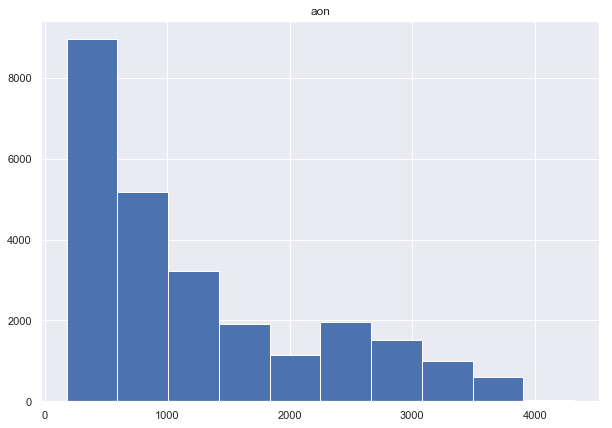

In [567]:
# Drawing histogram spread of age on network attribute
ax = high_value_customer.hist(column='aon', figsize=(10,7))

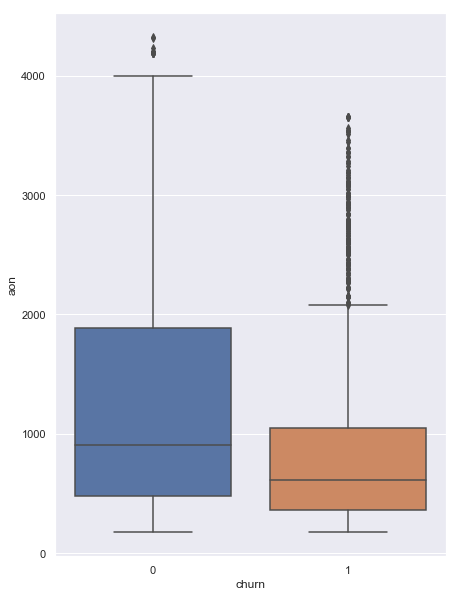

In [568]:
# Boxplot on age on network
plt.figure(figsize=(7,10))
sns.boxplot(x = 'churn', y ='aon', data = high_value_customer)

##### Two things we deduce from above box plot:
- Churners comparably have low age on network than non - churners
- Churn data has more outlier than non-churn data.

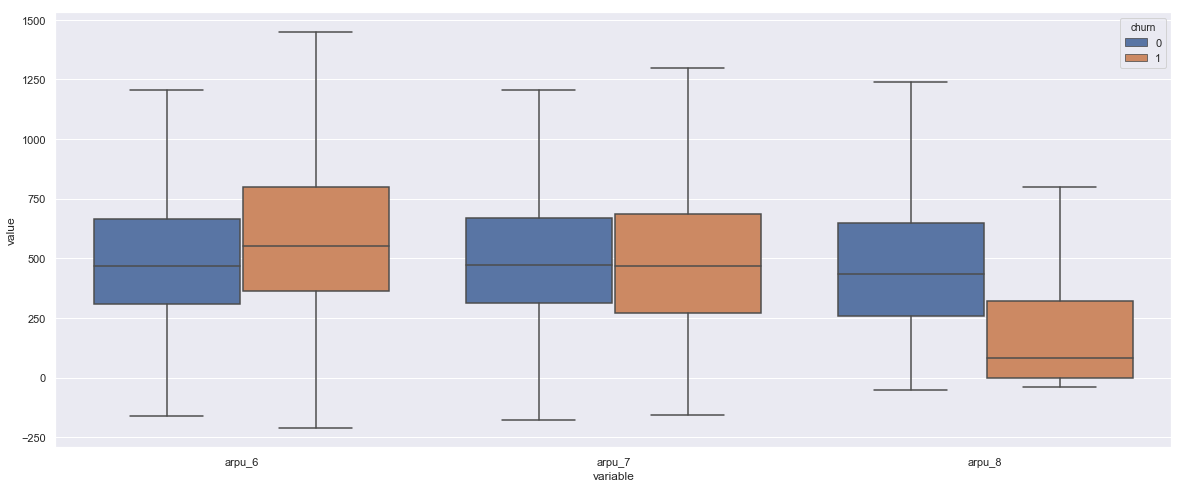

In [569]:
# Let's look at average revenue per user
mdf = pd.melt(high_value_customer[['arpu_6','arpu_7','arpu_8','churn']], id_vars=['churn'],value_vars=['arpu_6','arpu_7','arpu_8'])
sns.set(rc={'figure.figsize':(20,8)})
sns.boxplot(x = 'variable', y = 'value', hue = 'churn', data = mdf, showfliers=False)

##### We can deduce one thing from above average revenue per user falls for churner from June to August

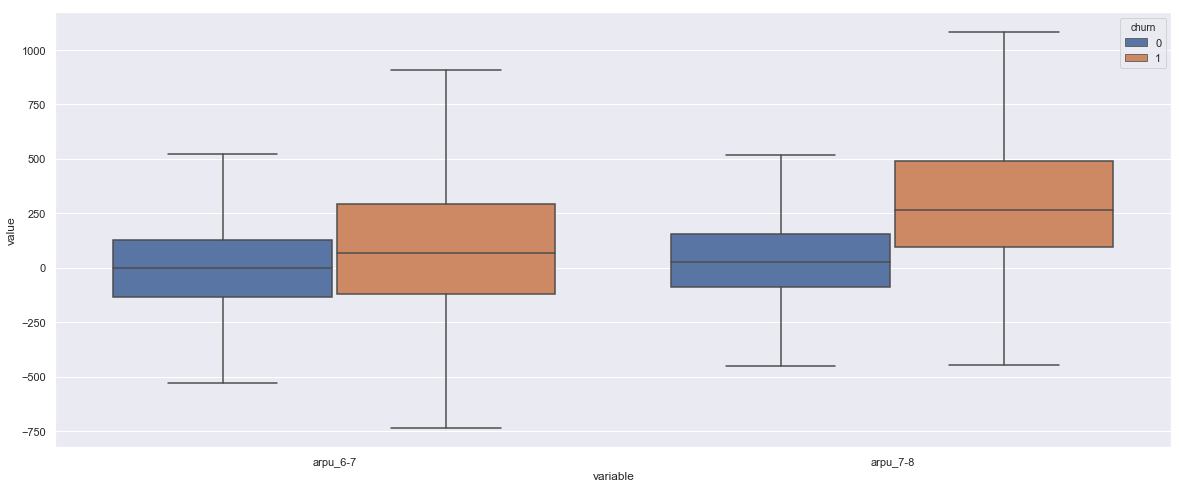

In [570]:
high_value_customer['arpu_6-7'] = high_value_customer['arpu_6'] -  high_value_customer['arpu_7']
high_value_customer['arpu_7-8'] = high_value_customer['arpu_7'] -  high_value_customer['arpu_8']

mdf = pd.melt(high_value_customer[['arpu_6-7','arpu_7-8','churn']], id_vars=['churn'],value_vars=['arpu_6-7','arpu_7-8'])
sns.set(rc={'figure.figsize':(20,8)})
sns.boxplot(x = 'variable', y = 'value', hue = 'churn', data = mdf, showfliers=False)

##### so average revenue per user is potential feature to discriminate between churner and non churner

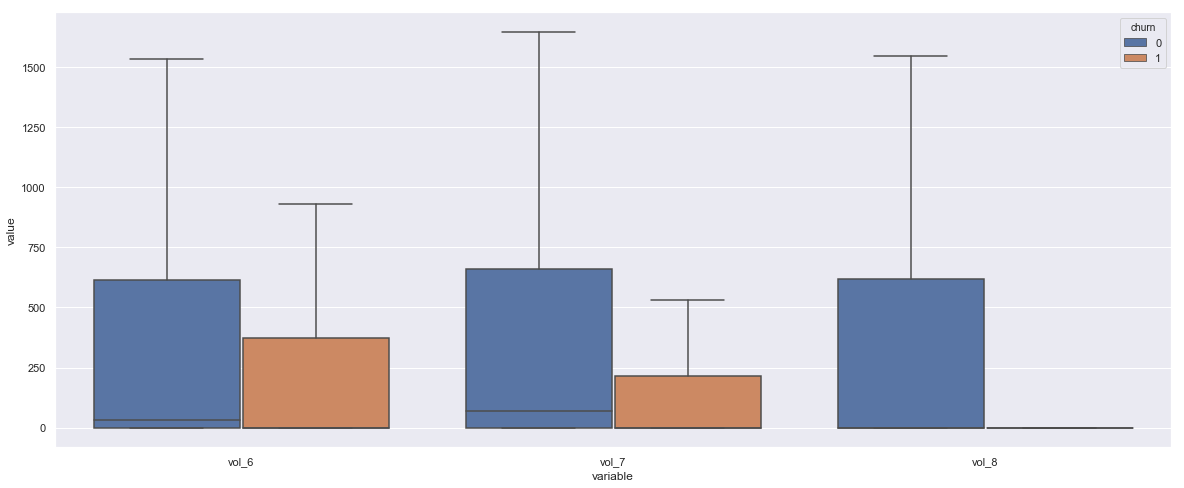

In [571]:
high_value_customer['vol_6'] = high_value_customer['vol_2g_mb_6'] +  high_value_customer['vol_3g_mb_6']
high_value_customer['vol_7'] = high_value_customer['vol_2g_mb_7'] +  high_value_customer['vol_3g_mb_7']
high_value_customer['vol_8'] = high_value_customer['vol_2g_mb_8'] +  high_value_customer['vol_3g_mb_8']

mdf_vol = pd.melt(high_value_customer[['vol_6','vol_7','vol_8','churn']], id_vars=['churn'],value_vars=['vol_6','vol_7','vol_8'])
sns.set(rc={'figure.figsize':(20,8)})
sns.boxplot(x = 'variable', y = 'value', hue = 'churn', data = mdf_vol, showfliers=False)

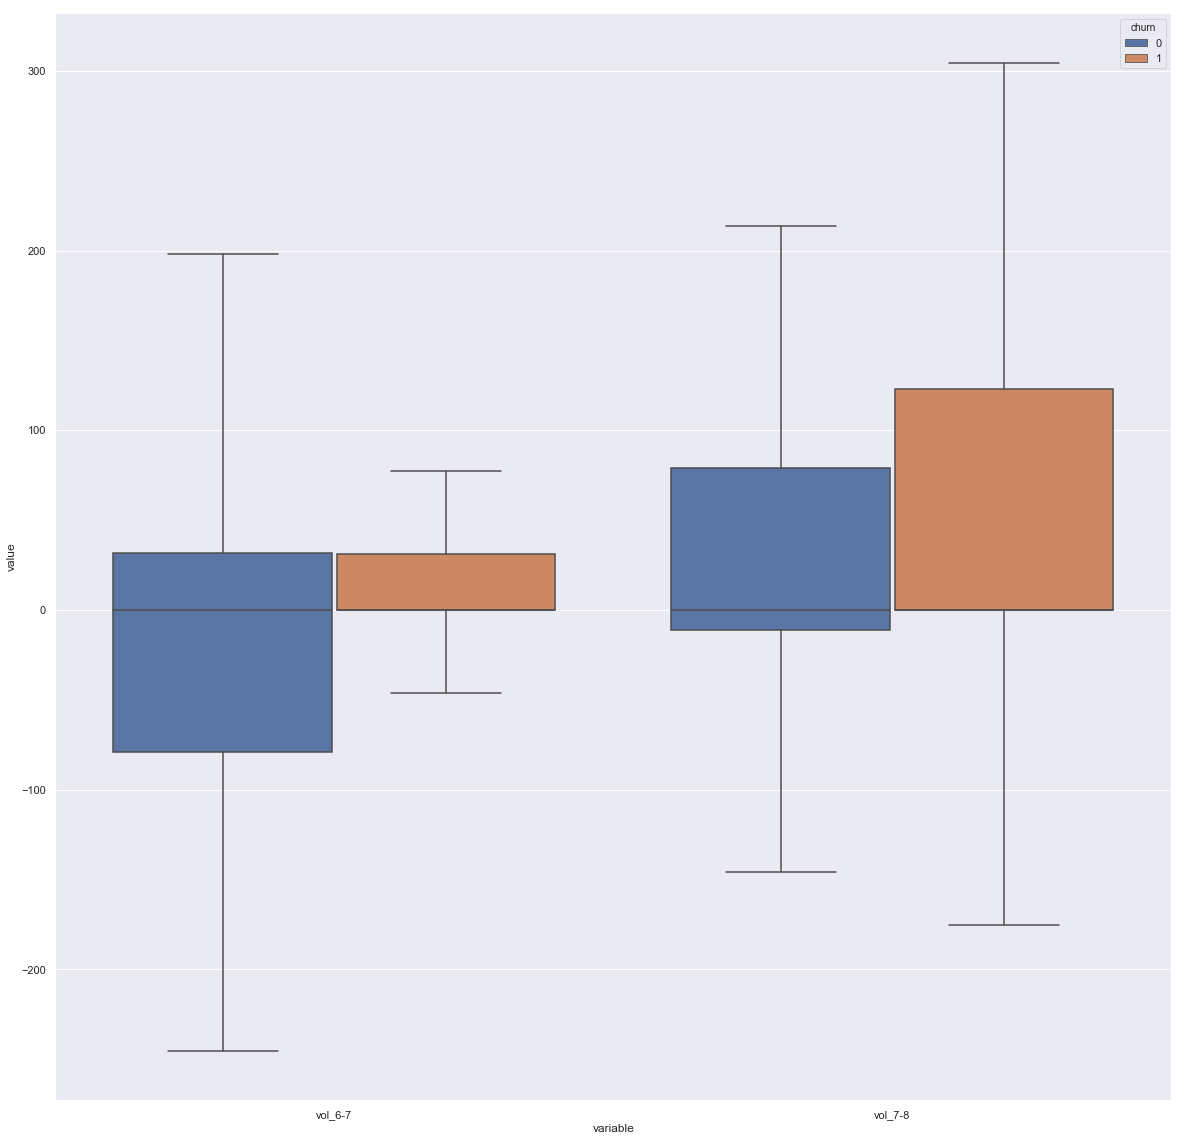

In [572]:
high_value_customer['vol_6-7'] = high_value_customer['vol_6'] -  high_value_customer['vol_7']
high_value_customer['vol_7-8'] = high_value_customer['vol_7'] -  high_value_customer['vol_8']

mdf_vol = pd.melt(high_value_customer[['vol_6-7','vol_7-8','churn']], id_vars=['churn'],value_vars=['vol_6-7','vol_7-8'])
sns.set(rc={'figure.figsize':(20,20)})
sns.boxplot(x = 'variable', y = 'value', hue = 'churn', data = mdf_vol, showfliers=False)

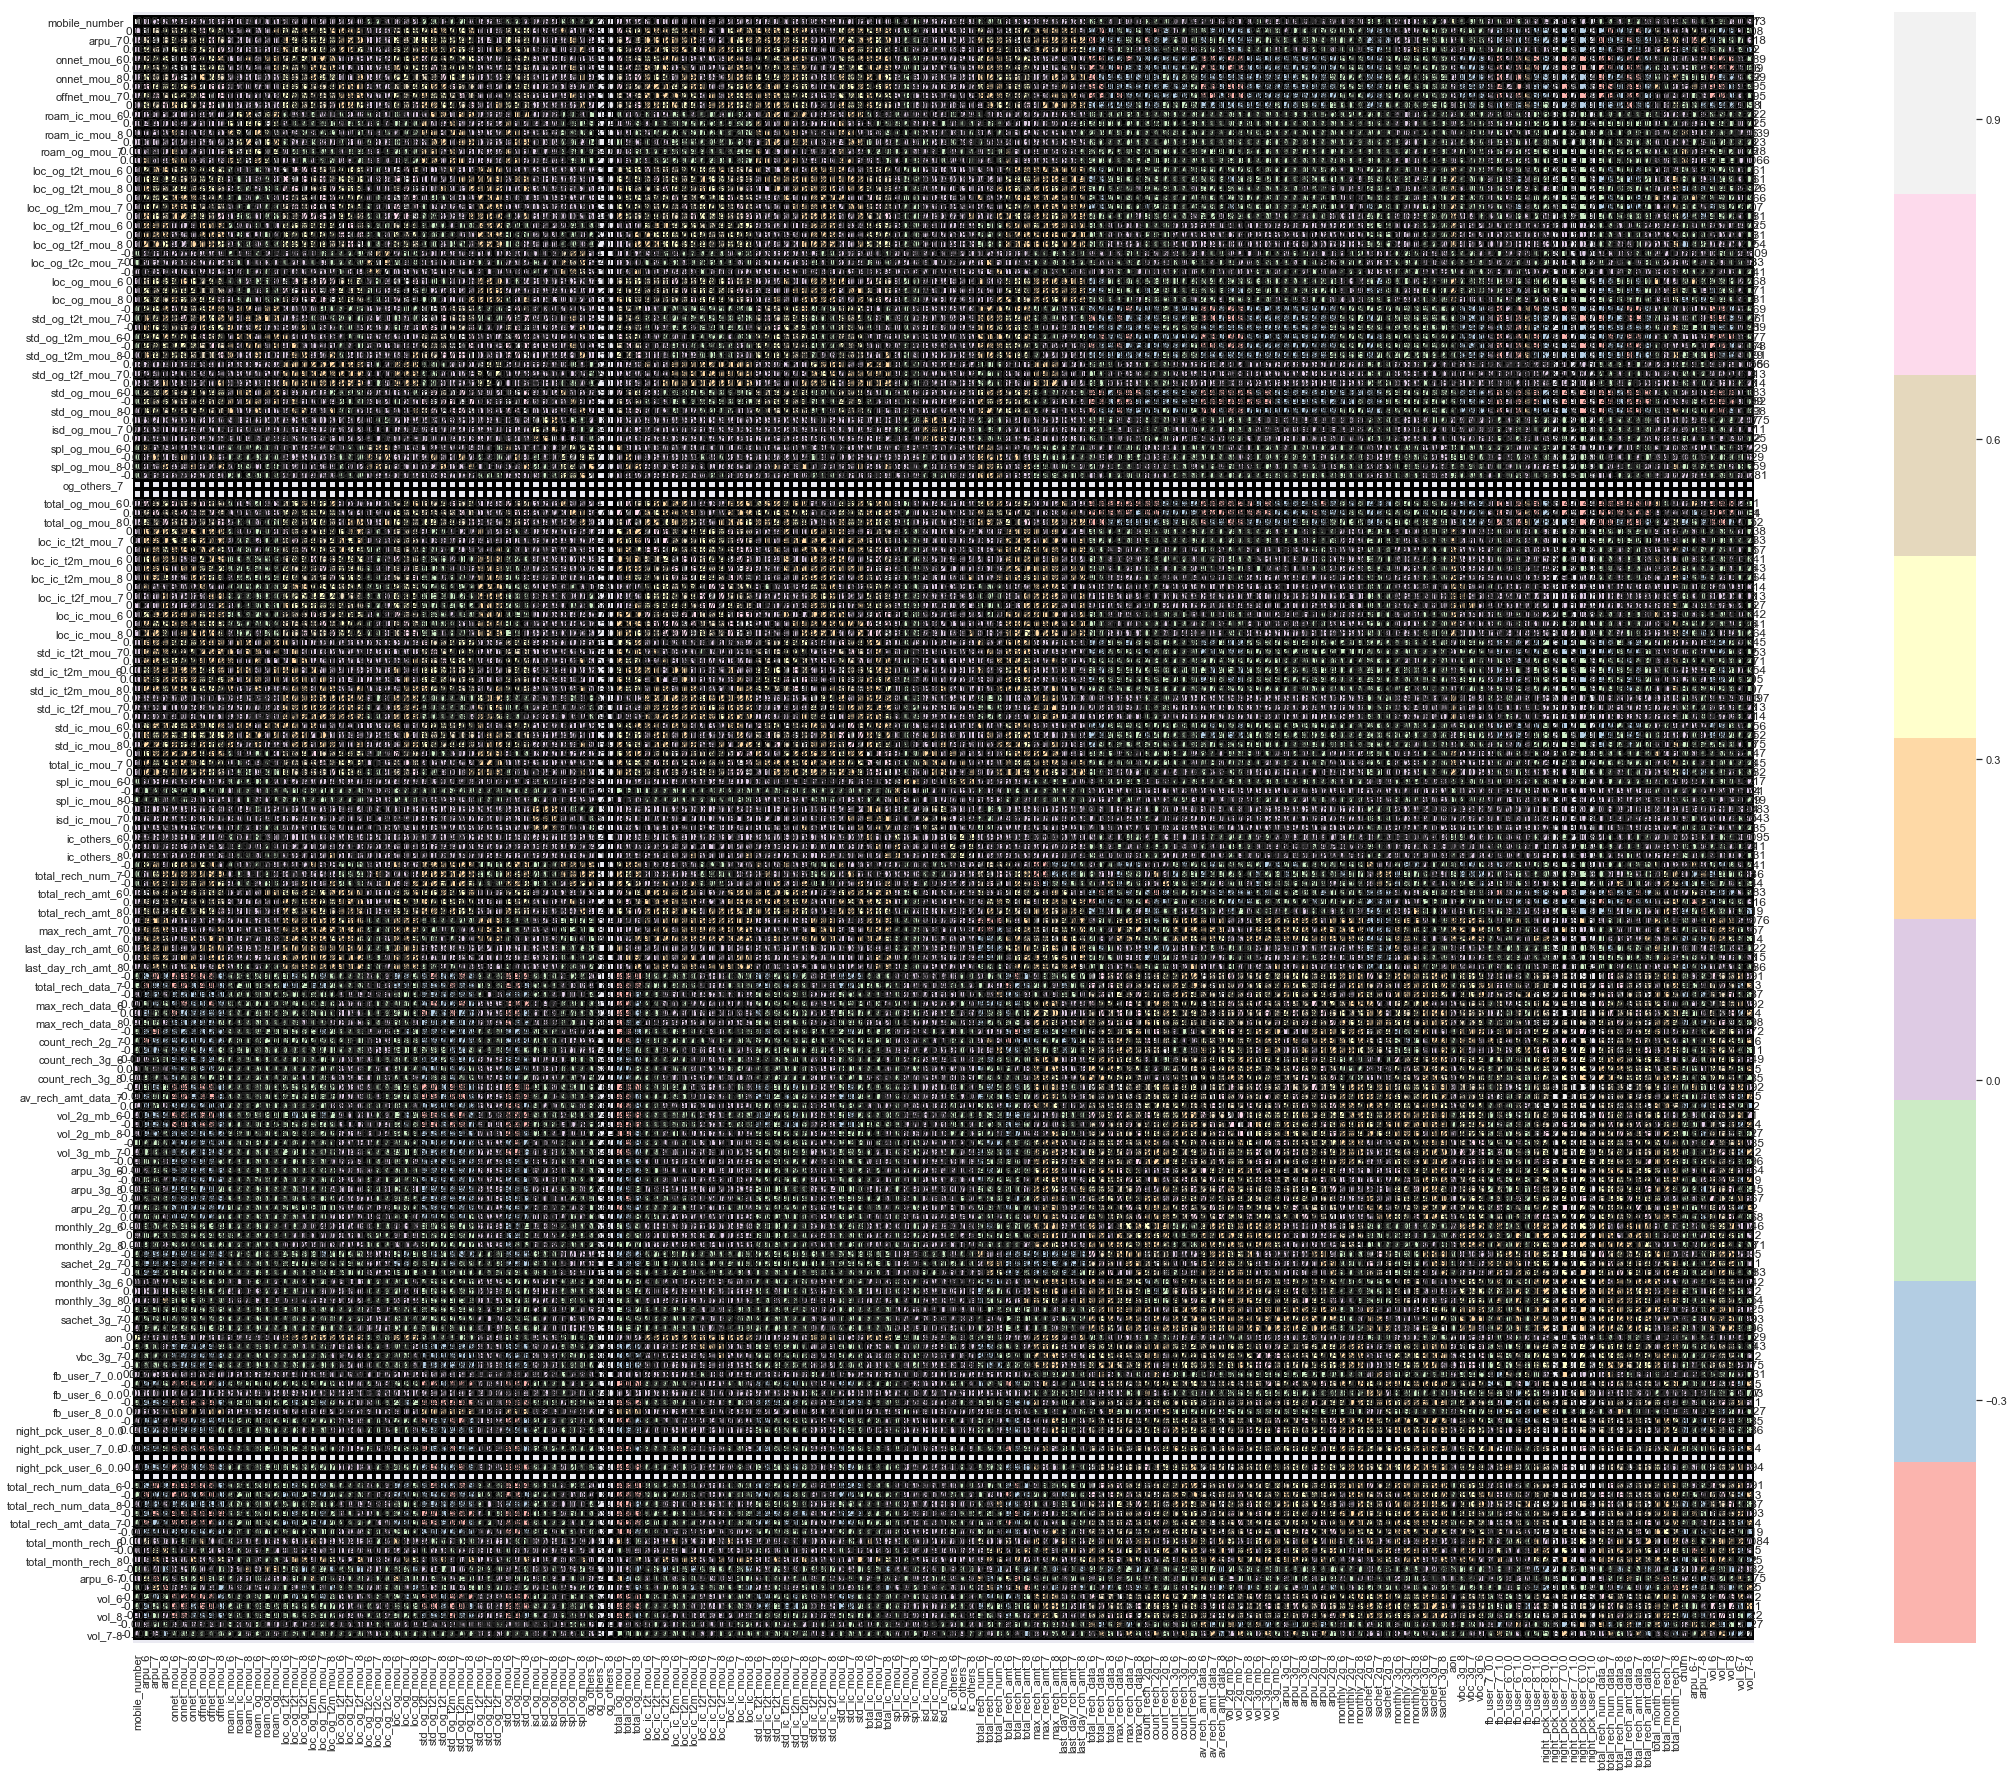

In [573]:
plt.figure(figsize=(50,30))
corr = high_value_customer.corr(method = 'spearman')
ax = sns.heatmap(corr, annot=True, cmap = 'Pastel1', square = 'True', linewidths=3, linecolor='black')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# populating X_train,y_train,X_test and y_test for model creation.

In [574]:
high_value_customer_PCA = high_value_customer.copy()

In [575]:
high_value_customer_PCA.shape

(25515, 175)

In [576]:
#REmoving mobile_number as it is not playing much role on finding the Churn analysis
high_value_customer_PCA.drop(['mobile_number'], axis=1, inplace=True)

In [577]:
from sklearn.model_selection import train_test_split

#putting features variables in X
X = high_value_customer_PCA.drop(['churn'], axis=1)

#putting response variables in Y
y = high_value_customer_PCA['churn']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [578]:
X_train.shape

(17860, 173)

In [579]:
X_test.shape


(7655, 173)

# Scaling Data.

In [580]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [581]:
# fitting and transforming the scaler on train
X_train = scaler.fit_transform(X_train)
# transforming the train using the already fit scaler
X_test = scaler.transform(X_test)

/Users/z003zyj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Class Imbalance.

In [582]:

print("Before Sampling churn =  '1': {}".format(sum(y_train==1)))
print("Before Sampling,churn = '0': {} ".format(sum(y_train==0)))
print("Before Sampling,churn  rate : {}% ".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before Sampling churn =  '1': 1340
Before Sampling,churn = '0': 16520 
Before Sampling,churn  rate : 7.5% 


In [583]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [584]:
print('After Sampling, train_X: {}'.format(X_train_res.shape))
print('After Sampling, train_y: {} \n'.format(y_train_res.shape))

After Sampling, train_X: (33040, 173)
After Sampling, train_y: (33040,) 



In [585]:
print("After Sampling, Churn= '1': {}".format(sum(y_train_res==1)))
print("After Sampling,Churn= '0': {}".format(sum(y_train_res==0)))
print("After Sampling, churn rate : {}% \n".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

After Sampling, Churn= '1': 16520
After Sampling,Churn= '0': 16520
After Sampling, churn rate : 50.0% 



# PCA Analysis..

In [696]:
from sklearn.decomposition import PCA

In [699]:
pca = PCA(random_state=42)

In [700]:
pca.fit(X_train_res)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [701]:
pca.components_

array([[-1.78992451e-02, -1.27631835e-02,  1.67230152e-03, ...,
         3.67261198e-02, -1.85320931e-03,  4.09403225e-03],
       [ 1.01774407e-02,  3.74540728e-02,  7.88944979e-02, ...,
         4.72733839e-02, -2.16005763e-02, -2.30622940e-02],
       [ 3.12713965e-02, -1.04560654e-02,  2.13704562e-02, ...,
         1.50574857e-02,  4.83389827e-02, -2.70210927e-02],
       ...,
       [ 0.00000000e+00,  3.00965112e-17, -2.40569854e-17, ...,
         1.01060851e-16, -1.01851097e-16, -2.88761302e-17],
       [-0.00000000e+00,  9.74680314e-02, -7.79099344e-02, ...,
         1.23526643e-01,  2.68676239e-02, -3.37079557e-02],
       [-5.73912498e-01,  3.49010790e-01,  1.43420923e-01, ...,
         2.87488329e-03,  1.27987615e-02,  9.95387583e-03]])

In [590]:
pca.explained_variance_ratio_

array([4.29675611e-01, 1.01258550e-01, 6.54167457e-02, 5.06233734e-02,
       3.87163367e-02, 3.02414674e-02, 2.39294793e-02, 1.75666999e-02,
       1.67090512e-02, 1.54108775e-02, 1.38845390e-02, 1.34921090e-02,
       1.26696764e-02, 9.17091223e-03, 8.88390566e-03, 8.27471837e-03,
       7.24118476e-03, 6.80355474e-03, 6.45712466e-03, 5.84887706e-03,
       5.30725921e-03, 5.01862022e-03, 4.56225220e-03, 4.34604410e-03,
       4.22467529e-03, 3.90079944e-03, 3.43223043e-03, 3.22222605e-03,
       3.15468261e-03, 3.01082605e-03, 2.99304437e-03, 2.69234073e-03,
       2.66236071e-03, 2.41131471e-03, 2.33067081e-03, 2.26027266e-03,
       2.22247283e-03, 2.12426064e-03, 2.01341084e-03, 1.94221163e-03,
       1.91291950e-03, 1.85239183e-03, 1.82868397e-03, 1.73886127e-03,
       1.63786106e-03, 1.59840907e-03, 1.54812512e-03, 1.51212632e-03,
       1.46534537e-03, 1.43606569e-03, 1.39907483e-03, 1.32569613e-03,
       1.28300558e-03, 1.24061071e-03, 1.17608464e-03, 1.09293323e-03,
      

In [702]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

PC1       PC2      Feature
0 -0.017899  0.010177       arpu_6
1 -0.012763  0.037454       arpu_7
2  0.001672  0.078894       arpu_8
3 -0.033639  0.022544  onnet_mou_6
4 -0.034647  0.037823  onnet_mou_7

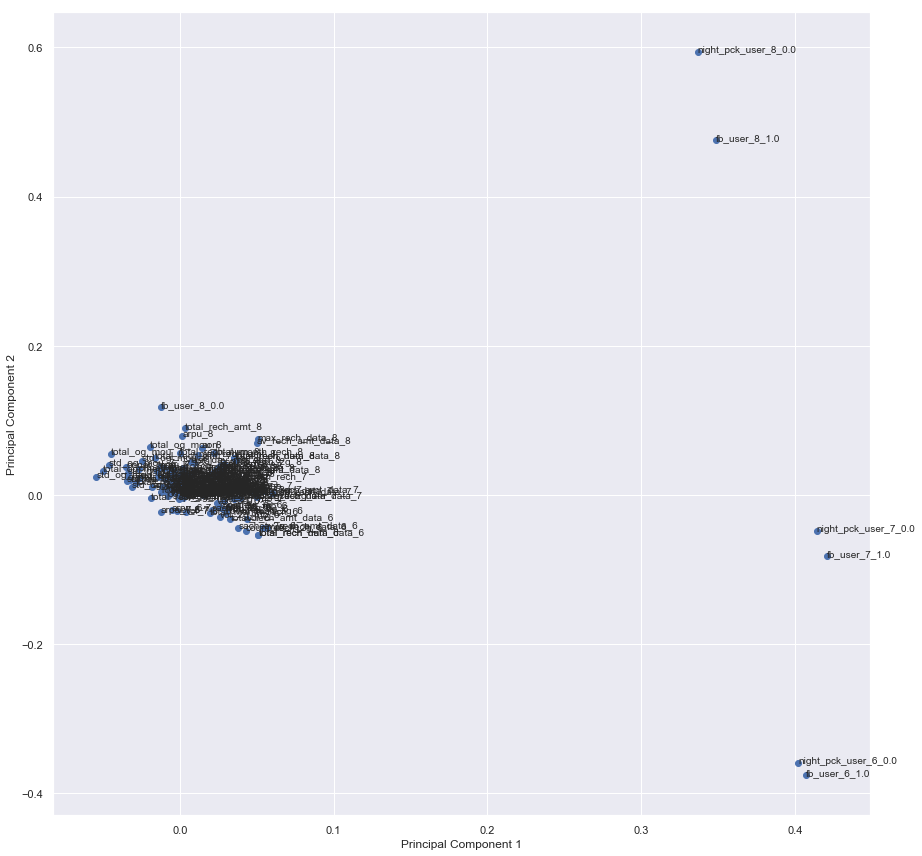

In [592]:
%matplotlib inline
fig = plt.figure(figsize = (13,12))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [593]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

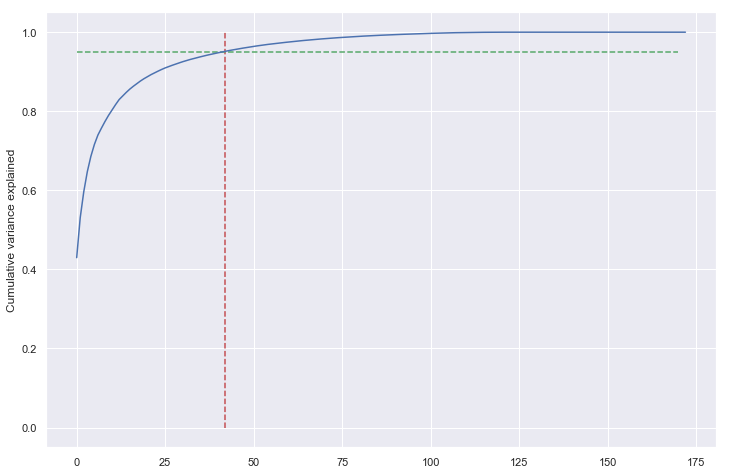

In [594]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=42, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=170, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [595]:
from sklearn.decomposition import IncrementalPCA

In [596]:
pca_final = IncrementalPCA(n_components=42)

In [597]:
df_train_pca = pca_final.fit_transform(X_train_res)

In [598]:
df_train_pca.shape

(33040, 42)

In [599]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [600]:
corrmat.shape

(42, 42)

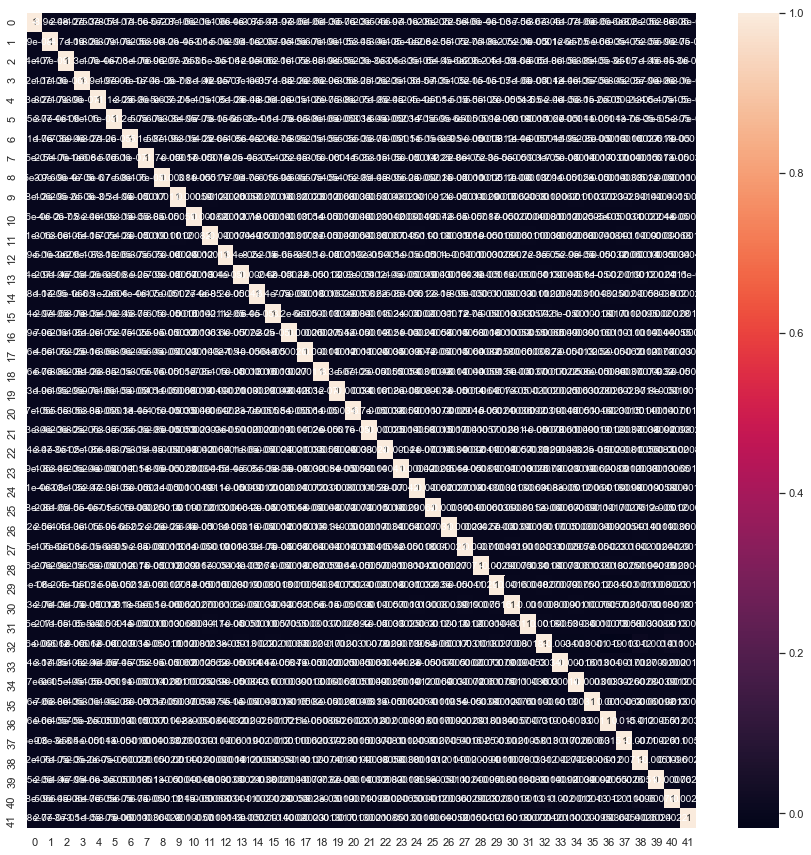

In [601]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [602]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(7655, 42)

# Common Features for Model building

In [707]:
def getModelMetrics(actual_churn=False,pred_churn=False):

    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    print('Specificity: {}'.format(TN / float(TN+FP)))
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))

In [708]:
def model_evaluation(y_pred_final):
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        y_pred_final[i]= y_pred_final.churn_Prob.map( lambda x: 1 if x > i else 0)
    display(y_pred_final.head())

In [784]:
def final_model(y_pred_final):
    confusion = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    display(confusion)
        
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    print('Specificity: {}'.format(TN / float(TN+FP)))
    print('Accuracy : ' , metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted))

In [710]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

# Building Model With Logistic Regression Model Tree with PCA

In [763]:
from sklearn.linear_model import LogisticRegression

logistic_pca = LogisticRegression()

In [764]:
logistic_model_pca = logistic_pca.fit(df_train_pca, y_train_res)

/Users/z003zyj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [765]:
pred_probs_test = logistic_model_pca.predict_proba(df_test_pca)

In [766]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.9'

In [767]:
metrics.roc_auc_score(y_test, pred_probs_test[:,1])

0.9008962008841556

In [768]:
y_pred = logistic_model_pca.predict(df_test_pca)

In [769]:
metrics.accuracy_score(y_test, y_pred)

0.8316133246244285

In [770]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      7116
           1       0.27      0.83      0.41       539

   micro avg       0.83      0.83      0.83      7655
   macro avg       0.63      0.83      0.66      7655
weighted avg       0.93      0.83      0.87      7655



In [771]:
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test,pred_churn=y_pred)

Roc_auc_score : 0.8296931527478385
Sensitivity/Recall : 0.8274582560296846
Specificity: 0.8319280494659921
False Positive Rate: 0.16807195053400786
Positive predictive value: 0.27161997563946405
Negative Predictive value: 0.9845335107267587
sklearn precision score value: 0.27161997563946405


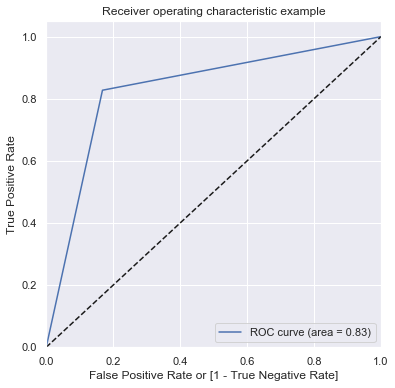

In [772]:
fig1 = draw_roc(y_test, y_pred)

In [773]:
cut_off_prob = 0.5
# predict
pred_probs_lr = logistic_model_pca.predict_proba(df_test_pca)[:,1]
y_df_lr= pd.DataFrame({'churn':y_test, 'churn_Prob':pred_probs_lr})
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_df_lr['final_predicted'] = y_df_lr.churn_Prob.map( lambda x: 1 if x > cut_off_prob else 0)

In [774]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[5920 1196]
 [  93  446]]
0.8316133246244285


     prob  accuracy     sensi     speci
0.0   0.0  0.070411  1.000000  0.000000
0.1   0.1  0.460745  0.964750  0.422569
0.2   0.2  0.600653  0.948052  0.574340
0.3   0.3  0.698628  0.907236  0.682827
0.4   0.4  0.772175  0.873840  0.764474
0.5   0.5  0.831613  0.827458  0.831928
0.6   0.6  0.874069  0.790353  0.880410
0.7   0.7  0.905552  0.745826  0.917650
0.8   0.8  0.923841  0.632653  0.945897
0.9   0.9  0.934161  0.330241  0.979904


<Figure size 576x720 with 0 Axes>

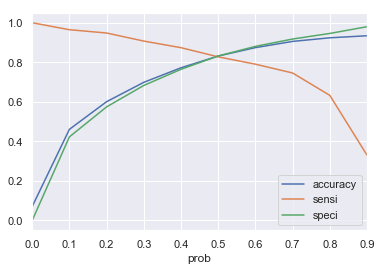

In [775]:
    plt.figure(figsize=(8,10))

    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        y_df_lr[i] = y_df_lr.churn_Prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(y_df_lr.churn, y_df_lr[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [776]:
  print('Accuracy : ' , metrics.accuracy_score(y_df_lr.churn, y_df_lr.final_predicted))

Accuracy :  0.8316133246244285


In [777]:
model_evaluation(y_df_lr)

churn  churn_Prob  final_predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
108        0    0.086150                0    1    0    0    0    0    0    0   
1715       0    0.314048                0    1    1    1    1    0    0    0   
15550      0    0.388964                0    1    1    1    1    0    0    0   
25937      0    0.003674                0    1    0    0    0    0    0    0   
1133       0    0.285502                0    1    1    1    0    0    0    0   

       0.7  0.8  0.9  
108      0    0    0  
1715     0    0    0  
15550    0    0    0  
25937    0    0    0  
1133     0    0    0

In [778]:
y_df_lr.head(10)

churn  churn_Prob  final_predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
108        0    0.086150                0    1    0    0    0    0    0    0   
1715       0    0.314048                0    1    1    1    1    0    0    0   
15550      0    0.388964                0    1    1    1    1    0    0    0   
25937      0    0.003674                0    1    0    0    0    0    0    0   
1133       0    0.285502                0    1    1    1    0    0    0    0   
7431       0    0.236801                0    1    1    1    0    0    0    0   
28804      0    0.268019                0    1    1    1    0    0    0    0   
22474      0    0.010744                0    1    0    0    0    0    0    0   
18704      0    0.130775                0    1    1    0    0    0    0    0   
13550      0    0.229764                0    1    1    1    0    0    0    0   

       0.7  0.8  0.9  
108      0    0    0  
1715     0    0    0  
15550    0    0    0  
25937    0    0    0  
1133     0    0    0  
7431     0    0    0  
28804    0    0    0  
22474    0    0    0  
18704    0    0    0  
13550    0    0    0

In [785]:
final_model(y_df_lr)

array([[5920, 1196],
       [  93,  446]])

Sensitivity/Recall : 0.8274582560296846
Specificity: 0.8319280494659921
Accuracy :  0.8316133246244285


# Building Model With Random Forest Model Tree with PCA

In [786]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

# fit
rfc.fit(df_train_pca, y_train_res)

/Users/z003zyj/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [787]:
# Making predictions
y_pred = rfc.predict(df_test_pca)

In [788]:
# Let's check the report of our default model
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7116
           1       0.39      0.48      0.43       539

   micro avg       0.91      0.91      0.91      7655
   macro avg       0.68      0.71      0.69      7655
weighted avg       0.92      0.91      0.92      7655



In [789]:
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test,pred_churn=y_pred)

Roc_auc_score : 0.7121540629129163
Sensitivity/Recall : 0.4805194805194805
Specificity: 0.9437886453063519
False Positive Rate: 0.056211354693648116
Positive predictive value: 0.3930197268588771
Negative Predictive value: 0.9599771297884505
sklearn precision score value: 0.3930197268588771


In [790]:
print(metrics.confusion_matrix(y_test,y_pred))

[[6716  400]
 [ 280  259]]


In [791]:
print(metrics.accuracy_score(y_test,y_pred))

0.9111691704768126


In [792]:
# Area under roc curve
pred_probs_test = rfc.predict_proba(df_test_pca)[:,1]
"{}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.8534882065657783'

In [796]:
# Create the parameter grid based on the results of random search 
param_grid_rf = {
    'max_depth': [8,10,12],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [12,15, 20]
}
# Create a based model
rf_model = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator = rf_model, param_grid = param_grid_rf, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [797]:
# Fit the grid search to the data
grid_search_rf.fit(df_train_pca, y_train_res)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 47.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [8, 10, 12], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [12, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [798]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search_rf.best_score_,'using',grid_search_rf.best_params_)

We can get accuracy of 0.8447336561743342 using {'max_depth': 12, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [800]:
rf_final = RandomForestClassifier(
                            max_depth=12,
                            max_features=15,
                            min_samples_leaf=100,
                            min_samples_split=200,
                            n_estimators=200,
                            random_state=None)

In [801]:
rf_final.fit(df_train_pca, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [802]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = rf_final.predict(df_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      7116
           1       0.31      0.76      0.44       539

   micro avg       0.86      0.86      0.86      7655
   macro avg       0.64      0.81      0.68      7655
weighted avg       0.93      0.86      0.89      7655



In [803]:
pred_probs_test_final_rf = rf_final.predict(df_test_pca)
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test_final_rf)

Roc_auc_score : 0.814467984035558
Sensitivity/Recall : 0.7569573283858998
Specificity: 0.8719786396852164
False Positive Rate: 0.1280213603147836
Positive predictive value: 0.30932524639878695
Negative Predictive value: 0.9793244949494949
sklearn precision score value: 0.30932524639878695


In [804]:
cut_off_prob = 0.5
# predict
pred_probs = rf_final.predict_proba(df_test_pca)[:,1]
y_df= pd.DataFrame({'churn':y_test, 'churn_Prob':pred_probs})
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > cut_off_prob else 0)

In [805]:
y_df.head(10)

churn  churn_Prob  final_predicted
108        0    0.092831                0
1715       0    0.310859                0
15550      0    0.190419                0
25937      0    0.159133                0
1133       0    0.367364                0
7431       0    0.098522                0
28804      0    0.073989                0
22474      0    0.124973                0
18704      0    0.257469                0
13550      0    0.133289                0

In [806]:
# confusion matrix
print(confusion_matrix(y_test,pred_probs_test_final_rf))
print(accuracy_score(y_test,pred_probs_test_final_rf))

[[6205  911]
 [ 131  408]]
0.863879817112998


     prob  accuracy     sensi     speci
0.0   0.0  0.070411  1.000000  0.000000
0.1   0.1  0.282952  0.988868  0.229483
0.2   0.2  0.542521  0.949907  0.511664
0.3   0.3  0.702678  0.886827  0.688730
0.4   0.4  0.801306  0.825603  0.799466
0.5   0.5  0.863880  0.756957  0.871979
0.6   0.6  0.899804  0.667904  0.917369
0.7   0.7  0.918354  0.528757  0.947864
0.8   0.8  0.930111  0.363636  0.973019
0.9   0.9  0.934291  0.165121  0.992552


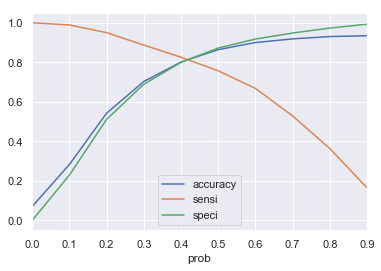

In [807]:
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        y_df[i] = y_df.churn_Prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(y_df.churn, y_df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [808]:
model_evaluation(y_df)

churn  churn_Prob  final_predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
108        0    0.092831                0    1    0    0    0    0    0    0   
1715       0    0.310859                0    1    1    1    1    0    0    0   
15550      0    0.190419                0    1    1    0    0    0    0    0   
25937      0    0.159133                0    1    1    0    0    0    0    0   
1133       0    0.367364                0    1    1    1    1    0    0    0   

       0.7  0.8  0.9  
108      0    0    0  
1715     0    0    0  
15550    0    0    0  
25937    0    0    0  
1133     0    0    0

In [809]:
final_model(y_df)

array([[6205,  911],
       [ 131,  408]])

Sensitivity/Recall : 0.7569573283858998
Specificity: 0.8719786396852164
Accuracy :  0.863879817112998


# Building Model With Decision Tree with PCA 

In [810]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier


In [811]:
dt_default = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=10)


In [812]:
dt_default.fit(df_train_pca, y_train_res)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=6,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [813]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(df_test_pca)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.81      0.89      7116
           1       0.22      0.70      0.34       539

   micro avg       0.81      0.81      0.81      7655
   macro avg       0.60      0.76      0.61      7655
weighted avg       0.92      0.81      0.85      7655



In [814]:
pred_probs_test = dt_default.predict(df_test_pca)
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.756340593879741
Sensitivity/Recall : 0.699443413729128
Specificity: 0.8132377740303541
False Positive Rate: 0.18676222596964587
Positive predictive value: 0.22098475967174677
Negative Predictive value: 0.972768532526475
sklearn precision score value: 0.22098475967174677


In [815]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[5787 1329]
 [ 162  377]]
0.8052253429131286


In [816]:

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [817]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(100, 400, 50),
    'min_samples_split': range(100, 400, 100),
    'max_features': [8,10,15],
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train_res)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2160 out of 2160 | elapsed: 11.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(5, 15, 3), 'min_samples_leaf': range(100, 400, 50), 'min_samples_split': range(100, 400, 100), 'max_features': [8, 10, 15], 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [824]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8147699757869249
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=14,
            max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [825]:
# model with optimal hyperparameters
clf_entropy = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = None,
                                  max_depth=14, 
                                  min_samples_leaf=100,
                                  min_samples_split=200,
                                  max_features=15)
clf_entropy.fit(df_train_pca, y_train_res)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=14,
            max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [826]:
# accuracy score
clf_entropy.score(df_test_pca,y_test)

0.7956890920966688

In [827]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_entropy.predict(df_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      7116
           1       0.21      0.71      0.33       539

   micro avg       0.80      0.80      0.80      7655
   macro avg       0.59      0.75      0.60      7655
weighted avg       0.92      0.80      0.84      7655



In [828]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[5711 1405]
 [ 159  380]]
0.7956890920966688


In [829]:
pred_probs_test_final = clf_entropy.predict(df_test_pca)
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test_final)

Roc_auc_score : 0.7537834465382044
Sensitivity/Recall : 0.7050092764378478
Specificity: 0.802557616638561
False Positive Rate: 0.19744238336143902
Positive predictive value: 0.21288515406162464
Negative Predictive value: 0.9729131175468484
sklearn precision score value: 0.21288515406162464


In [830]:
cut_off_prob = 0.5
# predict
pred_probs = clf_entropy.predict_proba(df_test_pca)[:,1]
y_df= pd.DataFrame({'churn':y_test, 'churn_Prob':pred_probs})
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > cut_off_prob else 0)

In [831]:
y_df.head(10)

churn  churn_Prob  final_predicted
108        0    0.000000                0
1715       0    0.000000                0
15550      0    0.215686                0
25937      0    0.000000                0
1133       0    0.050000                0
7431       0    0.000000                0
28804      0    0.092199                0
22474      0    0.150442                0
18704      0    0.690000                1
13550      0    0.092199                0

In [832]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[5711 1405]
 [ 159  380]]
0.7956890920966688


     prob  accuracy     sensi     speci
0.0   0.0  0.309732  0.964750  0.260118
0.1   0.1  0.531156  0.897959  0.503373
0.2   0.2  0.623775  0.857143  0.606099
0.3   0.3  0.681254  0.821892  0.670601
0.4   0.4  0.754017  0.736549  0.755340
0.5   0.5  0.795689  0.705009  0.802558
0.6   0.6  0.838929  0.627087  0.854975
0.7   0.7  0.873155  0.560297  0.896852
0.8   0.8  0.897191  0.428571  0.932687
0.9   0.9  0.920705  0.248609  0.971613


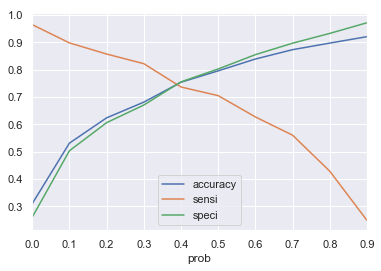

In [833]:
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        y_df[i] = y_df.churn_Prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(y_df.churn, y_df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [834]:
model_evaluation(y_df)

churn  churn_Prob  final_predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
108        0    0.000000                0    0    0    0    0    0    0    0   
1715       0    0.000000                0    0    0    0    0    0    0    0   
15550      0    0.215686                0    1    1    1    0    0    0    0   
25937      0    0.000000                0    0    0    0    0    0    0    0   
1133       0    0.050000                0    1    0    0    0    0    0    0   

       0.7  0.8  0.9  
108      0    0    0  
1715     0    0    0  
15550    0    0    0  
25937    0    0    0  
1133     0    0    0

In [835]:
final_model(y_df)

array([[5711, 1405],
       [ 159,  380]])

Sensitivity/Recall : 0.7050092764378478
Specificity: 0.802557616638561
Accuracy :  0.7956890920966688


# Identifying Important Features Using Without PCA Random Forest Model Building

In [836]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

In [838]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': [8,10,12],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [12,15, 20]
}
# Create a based model
rf_Non_PCA = RandomForestClassifier()
# Instantiate the grid search model
grid_search_Non_PCA = GridSearchCV(estimator = rf_Non_PCA, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [839]:
# Fit the grid search to the data
grid_search_Non_PCA.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 44.9min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed: 63.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [8, 10, 12], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [12, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [840]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search_Non_PCA.best_score_,'using',grid_search_Non_PCA.best_params_)

We can get accuracy of 0.9009685230024214 using {'criterion': 'entropy', 'max_depth': 12, 'max_features': 20, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [841]:
rf_final_Non_PCA = RandomForestClassifier(criterion= 'entropy',
                            max_depth=12,
                            max_features=20,
                            min_samples_leaf=100,
                            min_samples_split=200,
                            n_estimators=300,
                            random_state=None)

In [842]:
rf_final_Non_PCA.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=12, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [843]:
# predict
predictions = rf_final_Non_PCA.predict(X_test)

In [844]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [845]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      7116
           1       0.41      0.78      0.54       539

   micro avg       0.91      0.91      0.91      7655
   macro avg       0.70      0.85      0.74      7655
weighted avg       0.94      0.91      0.92      7655



In [847]:

getModelMetrics(actual_churn=y_test,pred_churn=predictions)

Roc_auc_score : 0.8471566075456705
Sensitivity/Recall : 0.7773654916512059
Specificity: 0.9169477234401349
False Positive Rate: 0.08305227655986509
Positive predictive value: 0.41485148514851483
Negative Predictive value: 0.981941309255079
sklearn precision score value: 0.41485148514851483


In [848]:
cut_off_prob = 0.5
# predict
pred_probs_non_pca = rf_final_Non_PCA.predict_proba(X_test)[:,1]
y_df= pd.DataFrame({'churn':y_test, 'churn_Prob':pred_probs_non_pca})
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > cut_off_prob else 0)

In [864]:
# confusion matrix
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[6525  591]
 [ 120  419]]
0.9071195297191378


     prob  accuracy     sensi     speci
0.0   0.0  0.070411  1.000000  0.000000
0.1   0.1  0.518093  0.972171  0.483699
0.2   0.2  0.735467  0.936920  0.720208
0.3   0.3  0.816199  0.890538  0.810568
0.4   0.4  0.873547  0.838590  0.876194
0.5   0.5  0.907120  0.777365  0.916948
0.6   0.6  0.930242  0.712430  0.946740
0.7   0.7  0.941868  0.634508  0.965149
0.8   0.8  0.947355  0.513915  0.980185
0.9   0.9  0.945003  0.274583  0.995784


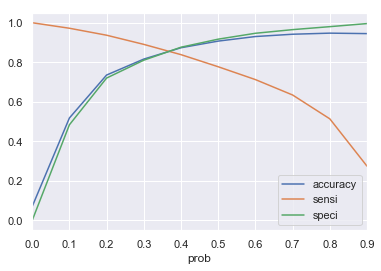

In [865]:
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        y_df[i] = y_df.churn_Prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(y_df.churn, y_df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [866]:
model_evaluation(y_df)

churn  churn_Prob  final_predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
108        0    0.081880                0    1    0    0    0    0    0    0   
1715       0    0.094423                0    1    0    0    0    0    0    0   
15550      0    0.075491                0    1    0    0    0    0    0    0   
25937      0    0.037434                0    1    0    0    0    0    0    0   
1133       0    0.158896                0    1    1    0    0    0    0    0   

       0.7  0.8  0.9  
108      0    0    0  
1715     0    0    0  
15550    0    0    0  
25937    0    0    0  
1133     0    0    0

In [867]:
final_model(y_df)

array([[6525,  591],
       [ 120,  419]])

Sensitivity/Recall : 0.7773654916512059
Specificity: 0.9169477234401349
Accuracy :  0.9071195297191378


In [868]:
rf_final_Non_PCA.feature_importances_

array([8.57255263e-04, 1.48536527e-03, 4.33109529e-02, 1.12408503e-03,
       1.58163430e-03, 5.93067334e-03, 6.14761025e-04, 7.98156341e-04,
       3.70188650e-03, 1.61681952e-03, 6.35942763e-03, 7.63106321e-02,
       2.18693522e-03, 8.53181572e-03, 8.38569499e-02, 9.43741548e-04,
       1.21850679e-03, 7.85574163e-03, 1.08869397e-03, 9.38423269e-04,
       1.69928672e-02, 8.96510170e-04, 1.17768689e-03, 2.55274806e-03,
       2.50381477e-04, 2.24525360e-03, 5.34053791e-04, 1.55414687e-03,
       1.40699251e-03, 1.49847673e-02, 6.56968725e-03, 4.83848845e-03,
       1.68844968e-03, 2.54368567e-03, 3.09423443e-03, 9.05708805e-03,
       3.62256199e-04, 4.94889675e-04, 4.95658193e-07, 2.99340592e-03,
       5.41499027e-03, 8.65828031e-03, 6.01637646e-05, 2.29808827e-05,
       2.35348238e-05, 2.69747432e-03, 8.51835136e-03, 1.26616529e-03,
       1.12259378e-03, 0.00000000e+00, 0.00000000e+00, 7.43877925e-04,
       1.55318354e-03, 2.00839603e-02, 1.59584273e-03, 1.63087799e-03,
      

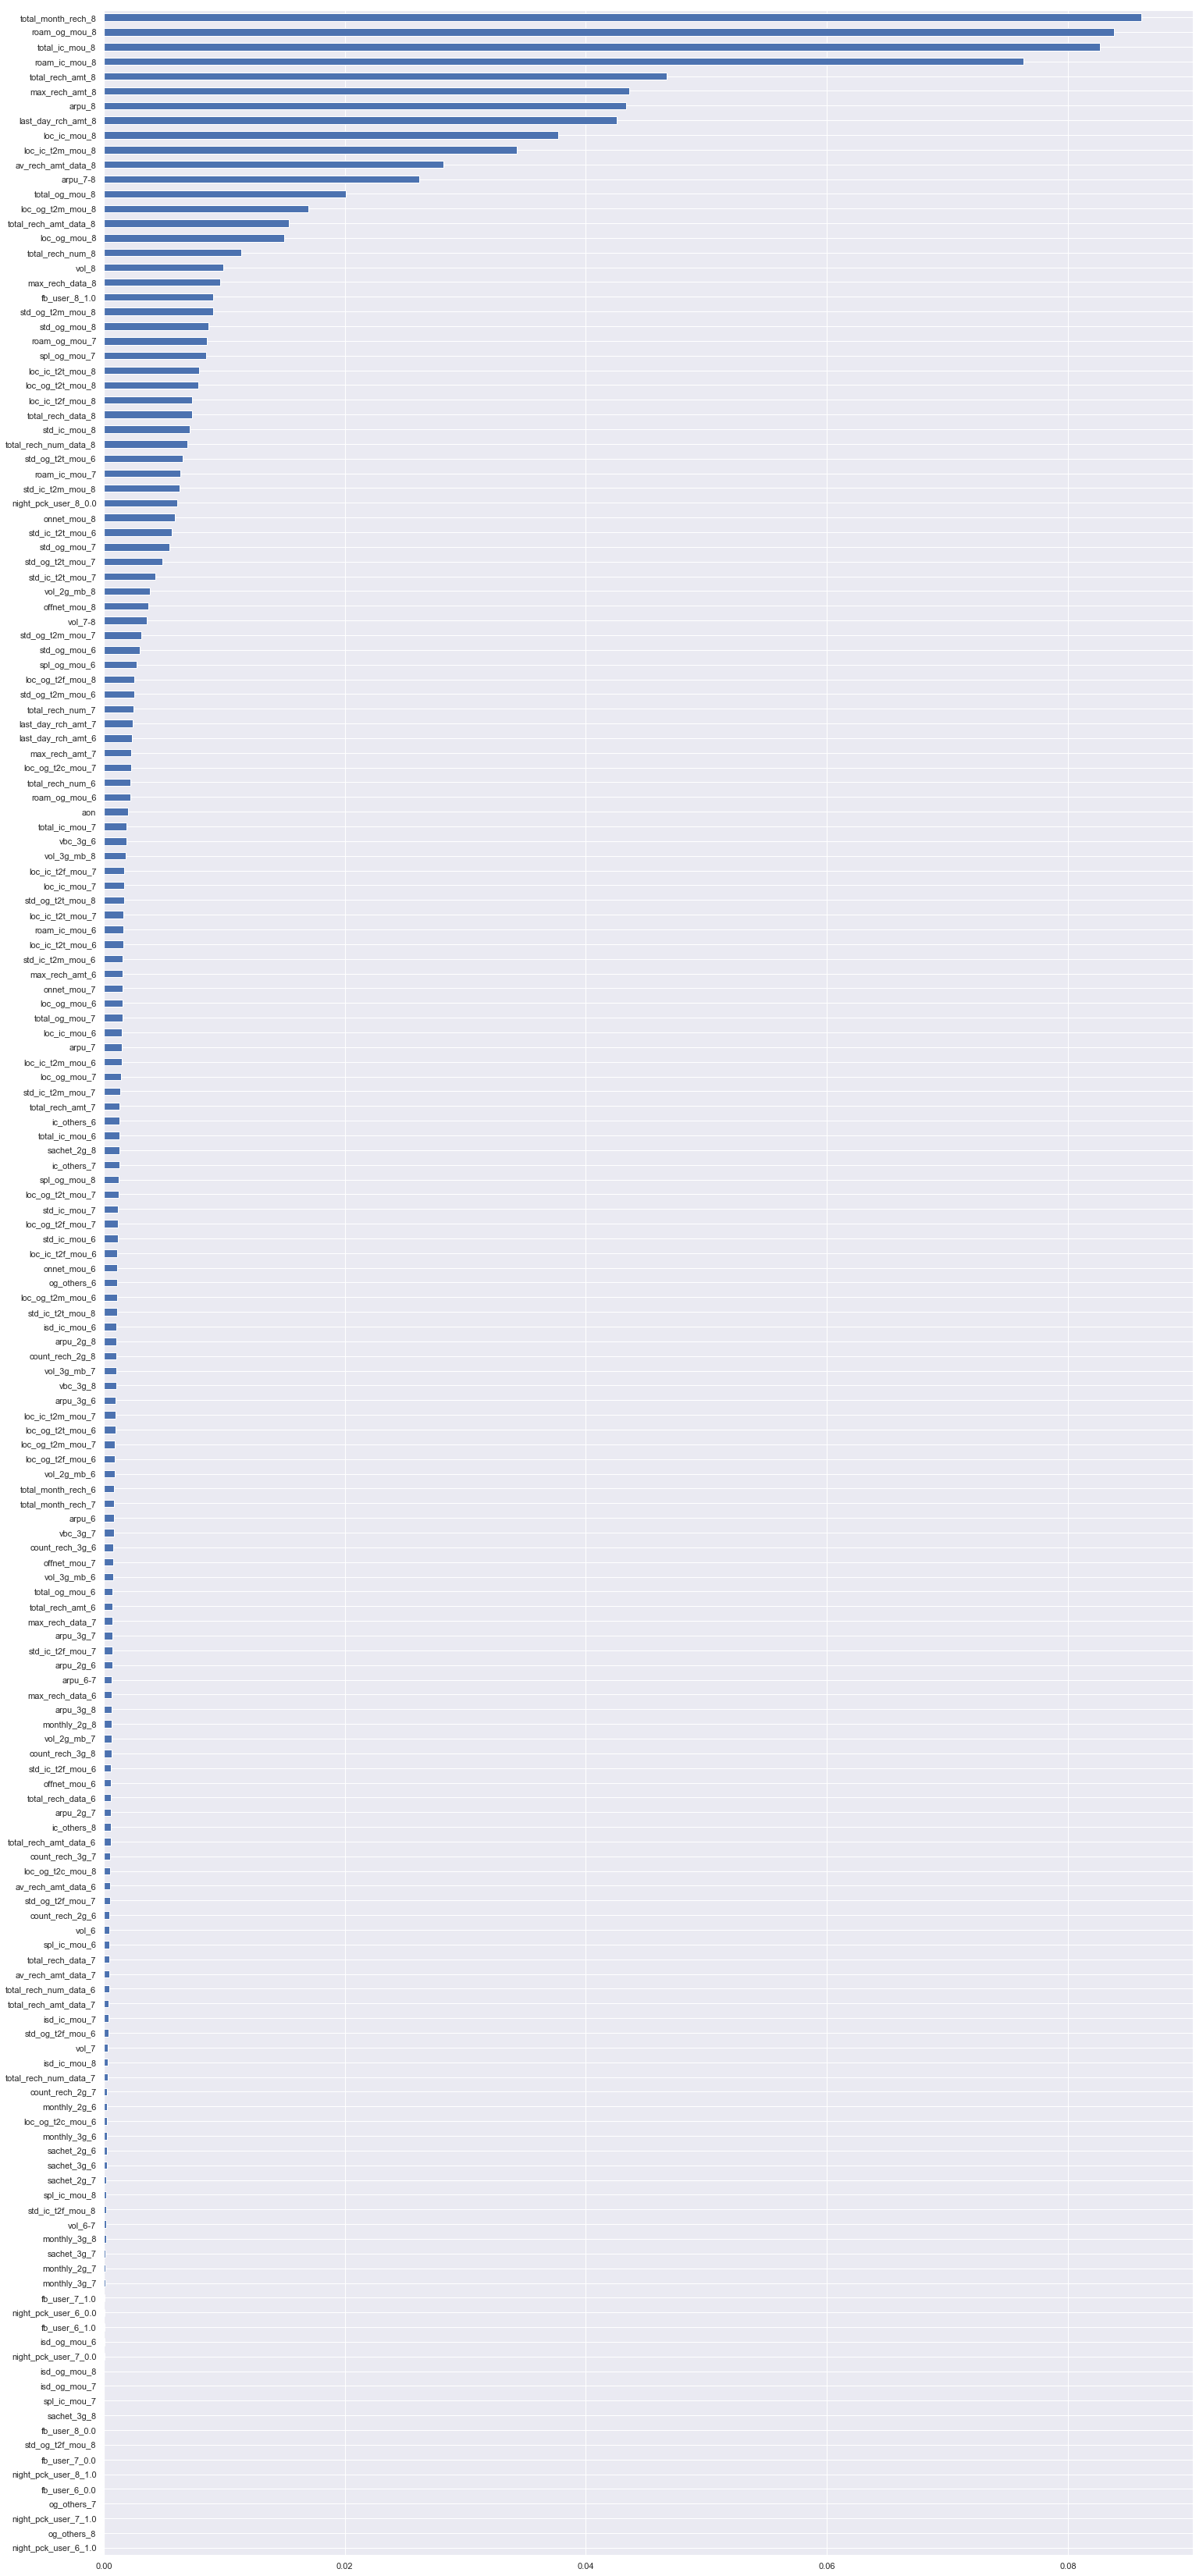

In [869]:
plt.figure(figsize=(25,60))
feat_importances = pd.Series(rf_final_Non_PCA.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')

In [870]:
feat_importances.sort_values(ascending=False)

total_month_rech_8       8.606853e-02
roam_og_mou_8            8.385695e-02
total_ic_mou_8           8.267028e-02
roam_ic_mou_8            7.631063e-02
total_rech_amt_8         4.672902e-02
max_rech_amt_8           4.361312e-02
arpu_8                   4.331095e-02
last_day_rch_amt_8       4.256658e-02
loc_ic_mou_8             3.772804e-02
loc_ic_t2m_mou_8         3.430211e-02
av_rech_amt_data_8       2.819278e-02
arpu_7-8                 2.616080e-02
total_og_mou_8           2.008396e-02
loc_og_t2m_mou_8         1.699287e-02
total_rech_amt_data_8    1.537655e-02
loc_og_mou_8             1.498477e-02
total_rech_num_8         1.137783e-02
vol_8                    9.929511e-03
max_rech_data_8          9.641965e-03
fb_user_8_1.0            9.070375e-03
std_og_t2m_mou_8         9.057088e-03
std_og_mou_8             8.658280e-03
roam_og_mou_7            8.531816e-03
spl_og_mou_7             8.518351e-03
loc_ic_t2t_mou_8         7.897428e-03
loc_og_t2t_mou_8         7.855742e-03
loc_ic_t2f_m

# Summary

##### Average revenue per user -
We found out the average revenue per user is vital feature both in EDA and PCA. There is a significant reduction 
in 'good month' months and very low on action month before customer decides to churn out from the network. 
These customers can be targeted for retaining.

##### Age on Network - 
We found out from EDA age on network (i.e. number of days spend on network) is very low compare to churners. 
They can be targeted with rewarding additional talk time or internet data with completion of milestion of each 
quarter 3, 6, 9 and 12 months (i.e. each quarter). 
And long term customers spend time on network should be recongnised and incentivized on time to time basis.

##### Off Network minute usage, Local incoming from other operator mobile
We found off network minute usage and local incoming network are also significant features from PCA. 
Company should provide smooth call experience from and to other networks to avoid customer churning 

# Final Choice of Model with PCA :

Sensitivity is the most important business metric for the telecom churn problem. The company would like to identify most customers at risk of churning, even if there are many customers that are misclassified as churn. 

## Model/Metrics   

### Logistic Regression (cut-off = 0.49)

- Sensitivity/Recall :   0.8274582560296846
- Specificity:           0.8319280494659921
- Accuracy :             0.8316133246244285


### DecisionTree (cut-off = 0.39)

- Sensitivity/Recall : 0.7050092764378478
- Specificity: 0.802557616638561
- Accuracy :  0.7956890920966688	

### Random Forest (cut-off = 0.42)

- Sensitivity/Recall :    0.7569573283858998
- Specificity:            0.8719786396852164
- Accuracy :              0.863879817112998	


Overall, the Logistic Regression model with probability cut-off = 0.49, performs best interms of all param consistency. It achieved the best recall accuracy of 83.16% for test data. Also the overall accuracy and specificity is consistent for Test and train data, thus avoiding overfitting. So the business objective to predict Churn customers is most accuratety captured by it.

The Decision Tree Model obtaining only 79.56%  accuracy on test data. 

The Random Forest avoided overfitting but obtained  86.38%  accuracy on test data but the sensitivity is little less over here. If We will give more priority on Accuracy then we can go for Random forest too.



# Feature Selection using Non- PCA Random Forest Model 

## Random Forest  Model Result :
    
 We can get accuracy of 0.9009685230024214 using {'criterion': 'entropy', 'max_depth': 12, 'max_features': 20, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}
 
- Sensitivity/Recall : 0.7773654916512059
- Specificity: 0.9169477234401349
- Accuracy :  0.9071195297191378

## Top 20 Feature :
    
-  total_month_rech_8  
-  roam_og_mou_8    
-  total_ic_mou_8 
-  roam_ic_mou_8   
-  total_rech_amt_8 
-  max_rech_amt_8  
-  arpu_8      
-  last_day_rch_amt_8 
-  loc_ic_mou_8     
- loc_ic_t2m_mou_8  
- av_rech_amt_data_8  
- arpu_7-8     
- total_og_mou_8          
- loc_og_t2m_mou_8        
- total_rech_amt_data_8  
- loc_og_mou_8            
- total_rech_num_8     
- vol_8                   
- max_rech_data_8         
- fb_user_8_1.0            

Overall Based on Above feature analysis it is highly recomended to reatin high value customer Operator should look into below points:

    1)Customer churn seems to be well predicted by drop in usage.
    2)Improving Roaming Outgoing/Incoming Services.
    3)Good Service provided in incoming network.